# **Customer Lifetime Value**

**Context**

Nilai seumur hidup pelanggan, atau CLV, adalah ukuran seberapa berharganya seorang pelanggan bagi sebuah perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa keuntungan yang diperoleh dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh atau mempertahankan pelanggan baru. Angka ini cukup penting bagi perusahaan untuk mengetahui apakah perusahaan ingin menargetkan pemasaran kepada pelanggan yang bernilai secara efektif dan bagaimana perubahan pelanggan perusahaan di masa depan.

Dengan mengetahui CLV, perusahaan dapat mengidentifikasi segmen pelanggan paling menguntungkan dan merancang strategi retensi yang lebih efisien. CLV juga dapat menjadi dasar dalam menilai efektivitas kampanye pemasaran dan perencanaan investasi jangka panjang dalam akuisisi pelanggan baru.

**Problem Statement**

Salah satu tantangan utama bagi perusahaan adalah bagaimana mengidentifikasi pelanggan yang paling bernilai dan bagaimana mengalokasikan sumber daya secara efektif untuk mempertahankan mereka. Banyak perusahaan tidak memiliki sistem yang efisien untuk memprediksi nilai masa depan dari pelanggan mereka, sehingga cenderung menggunakan pendekatan umum dalam strategi pemasaran dan retensi, yang mungkin tidak optimal.

Tanpa adanya sistem prediktif untuk menghitung CLV, perusahaan berisiko menghabiskan sumber daya untuk mempertahankan pelanggan yang memiliki nilai rendah, atau bahkan kehilangan pelanggan bernilai tinggi karena kurangnya upaya retensi yang tepat. Oleh karena itu, diperlukan suatu pendekatan berbasis data yang dapat membantu memprediksi CLV setiap pelanggan secara akurat.

**Goals**

Tujuan dari proyek ini adalah membangun model prediktif untuk menghitung nilai seumur hidup pelanggan (CLV) berdasarkan berbagai fitur demografis, kebiasaan pelanggan, dan informasi terkait lainnya. Dengan adanya model ini, perusahaan dapat:

- Mengidentifikasi pelanggan bernilai tinggi sejak awal.
- Mengalokasikan anggaran pemasaran secara lebih tepat sasaran.
- Meningkatkan efektivitas kampanye retensi.
- Meningkatkan ROI (Return on Investment) secara keseluruhan.
- Menyusun strategi upselling dan cross-selling yang lebih tepat.

**Analytic Approach**

Langkah-langkah yang akan dilakukan meliputi:

1. **Eksplorasi Data dan Pra-pemrosesan**: Memahami distribusi data, mendeteksi outlier, serta menangani nilai hilang.
2. **Feature Engineering**: Membuat variabel baru yang lebih representatif dari perilaku pelanggan.
3. **Pemodelan**: Menggunakan algoritma regresi (seperti Linear Regression, Random Forest, XGBoost, dll) untuk memprediksi nilai CLV.
4. **Evaluasi Model**: Menggunakan berbagai metrik untuk mengukur performa prediksi.
5. **Interpretasi Hasil**: Mengidentifikasi fitur-fitur paling berpengaruh terhadap nilai CLV.

**Metric Evaluation**

Untuk mengevaluasi performa model prediksi CLV, akan digunakan beberapa metrik berikut:

- **Mean Absolute Error (MAE)**: Mengukur rata-rata dari selisih absolut antara nilai aktual dan prediksi.
- **Root Mean Squared Error (RMSE)**: Menghitung akar kuadrat dari rata-rata kesalahan kuadrat; sensitif terhadap error besar.
- **Mean Absolute Percentage Error (MAPE)**: Mengukur rata-rata persentase kesalahan prediksi terhadap nilai aktual.
- **R-squared (R²)**: Jika digunakan model linear, metrik ini menunjukkan seberapa besar variasi dalam data yang dapat dijelaskan oleh model.

Semakin kecil nilai MAE, RMSE, dan MAPE, serta semakin tinggi nilai R² (mendekati 1), maka semakin baik model tersebut dalam memprediksi CLV secara akurat.

# **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## Data Understanding

- Dataset merupakan data pelanggan yang berkaitan dengan nilai seumur hidup pelanggan (Customer Lifetime Value).
- Setiap baris data merepresentasikan informasi terkait pelanggan, polis asuransi, dan karakteristik lainnya.

**Attributes Information**

| **Atribut**                | **Tipe Data** | **Deskripsi**                                                                 |
|---------------------------|---------------|--------------------------------------------------------------------------------|
| `Vehicle Class`           | Object        | Kategori kendaraan yang digunakan pelanggan (misalnya: SUV, Sedan)             |
| `Coverage`                | Object        | Jenis perlindungan asuransi yang diambil pelanggan                             |
| `Renew Offer Type`        | Object        | Jenis penawaran perpanjangan asuransi yang diberikan kepada pelanggan          |
| `EmploymentStatus`        | Object        | Status pekerjaan pelanggan (misalnya: Bekerja, Tidak bekerja, Mahasiswa)       |
| `Marital Status`          | Object        | Status pernikahan pelanggan (misalnya: Menikah, Lajang)                        |
| `Education`               | Object        | Tingkat pendidikan terakhir pelanggan                                          |
| `Number of Policies`      | Float       | Jumlah produk asuransi yang dimiliki oleh pelanggan                            |
| `Monthly Premium Auto`    | Float       | Biaya premi bulanan untuk asuransi kendaraan yang dibayarkan oleh pelanggan    |
| `Total Claim Amount`      | Float         | Total klaim asuransi yang pernah diajukan oleh pelanggan                       |
| `Income`                  | Float       | Pendapatan tahunan pelanggan                                                   |
| `Customer Lifetime Value` | Float         | Perkiraan nilai total pelanggan selama mereka tetap menjadi pelanggan perusahaan |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


## **Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [4]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Terlihat dari data yg telah saya dapat, tidak terdapat missing value

In [5]:
df.duplicated().sum()

618

Terdapat 618 data yg duplikat

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
# Ubah number of police jadi object
df.loc[:, 'Number of Policies'] = df['Number of Policies'].astype(object)

C:\Users\alisyaramadhanifatin\AppData\Local\Temp\ipykernel_24876\3206331137.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.0 6.0 2.0 ... 2.0 1.0 1.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Number of Policies'] = df['Number of Policies'].astype(object)


**Kenapa di drop yang duplikat?**

Jawaban: Karena terlihat dari baris-baris tersebut merupakan data yang identik sehingga sementara data bisa di drop atau dihapus dahulu, juga terdapat kemungkinan data tersebut tidak sengaja terduplikat sehingga Tidak ada informasi tambahan yang akan hilang jika kita hapus.

### **Tinjauan Segmentasi Pelanggan**

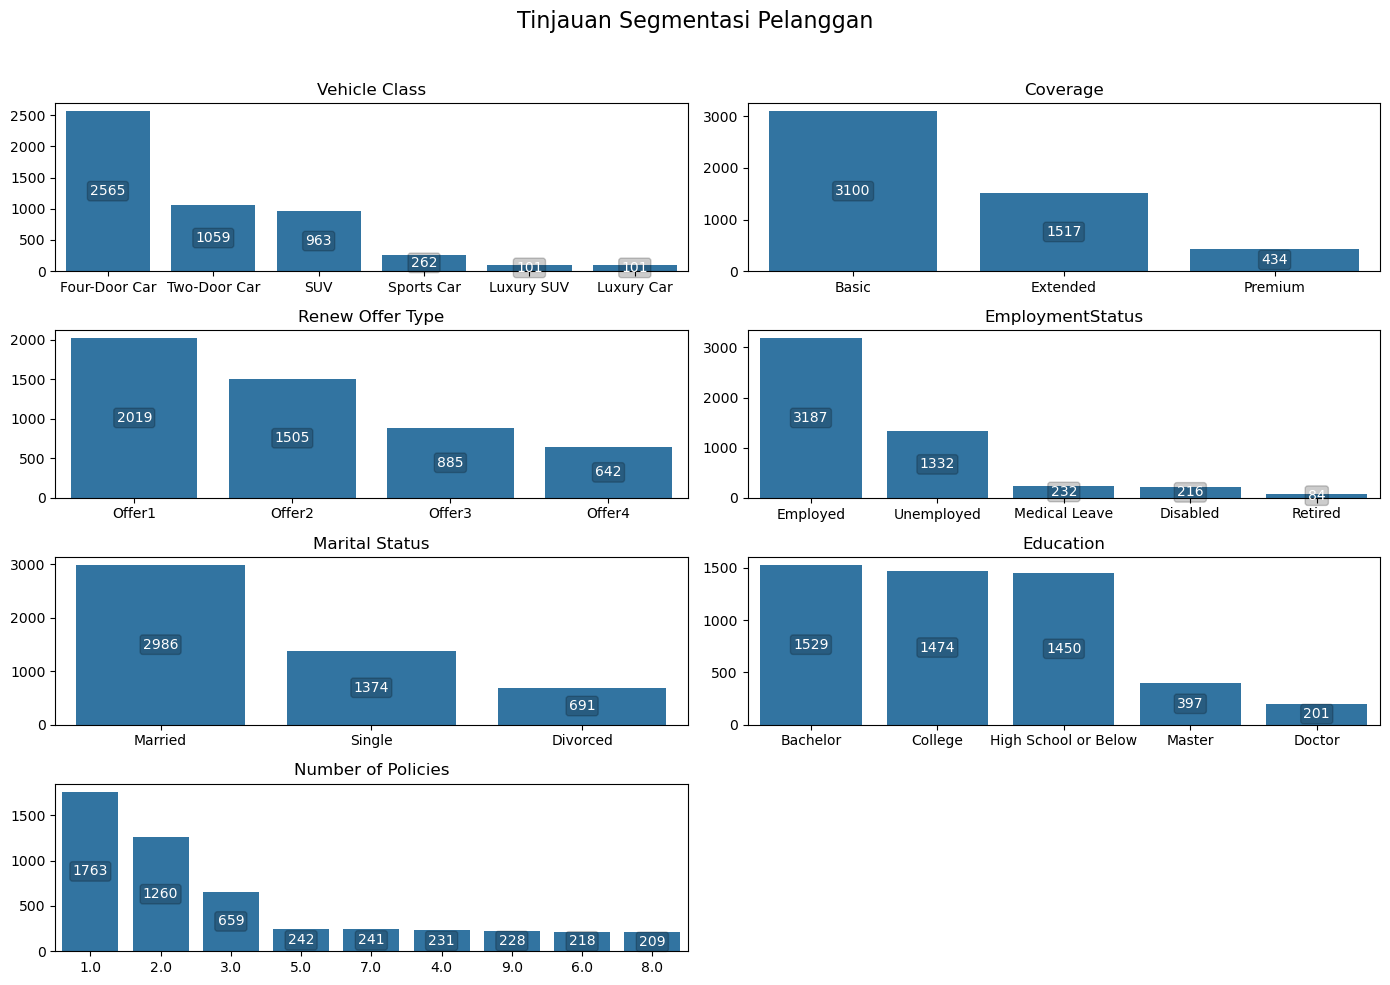

In [9]:
categorical_columns = df.select_dtypes(include='object').columns

n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
fig.suptitle('Tinjauan Segmentasi Pelanggan', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=0)

    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(
            f'{height}',
            (p.get_x() + p.get_width() / 2., height / 2),  # posisi vertikal tengah batang
            ha='center',
            va='center',
            fontsize=10,
            color='white',  # agar kontras dengan batang
            bbox=dict(facecolor='black', alpha=0.2, boxstyle='round,pad=0.2')
        )

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisasi tersebut menunjukkan segmentasi pelanggan berdasarkan beberapa atribut utama. Dari sisi **Vehicle Class**, mayoritas pelanggan memiliki kendaraan jenis **Four-Door Car** dengan jumlah mencapai 2565 orang, diikuti oleh **Two-Door Car** sebanyak 1059 dan **SUV** sebanyak 963. Jenis kendaraan mewah seperti **Sports Car**, **Luxury SUV**, dan **Luxury Car** memiliki jumlah yang relatif sedikit, masing-masing sekitar 100–262 pelanggan. Dari kategori **Coverage**, terlihat bahwa sebagian besar pelanggan memilih cakupan asuransi tipe **Basic** (3100 pelanggan), sedangkan tipe **Extended** (1517) dan **Premium** (434) memiliki jumlah pelanggan yang jauh lebih rendah. Preferensi ini menunjukkan bahwa mayoritas pelanggan lebih memilih opsi perlindungan dasar dibandingkan dengan yang lebih komprehensif.

Dalam hal **Renew Offer Type**, penawaran pembaruan yang paling populer adalah **Offer1** dengan 2019 pelanggan, diikuti oleh **Offer2** sebanyak 1505. Sementara itu, **Offer3** (885) dan **Offer4** (642) memiliki angka yang lebih kecil, menunjukkan bahwa kedua penawaran tersebut kurang diminati oleh pelanggan. Berdasarkan status pekerjaan (**Employment Status**), mayoritas pelanggan berada dalam kategori **Employed** (3187), diikuti oleh **Unemployed** (1332). Kelompok lain seperti **Medical Leave** (232), **Disabled** (216), dan **Retired** (88) memiliki proporsi yang jauh lebih kecil.

Dari segi **Marital Status**, sebagian besar pelanggan berstatus **Married** (2986), yang jauh lebih banyak dibandingkan dengan yang **Single** (1374) dan **Divorced** (691). Hal ini mengindikasikan bahwa pelanggan yang menikah cenderung lebih banyak berinvestasi pada asuransi. Berdasarkan tingkat pendidikan (**Education**), pelanggan dengan gelar **Bachelor** mendominasi dengan jumlah 1529, diikuti oleh mereka yang berpendidikan **College** (1474) dan **High School or Below** (1450). Tingkat pendidikan yang lebih tinggi, seperti **Master** (397) dan **Doctor** (201), memiliki jumlah pelanggan yang relatif kecil.

Terakhir, dalam hal jumlah polis yang dimiliki (**Number of Policies**), mayoritas pelanggan hanya memiliki **1 atau 2 polis asuransi** dengan jumlah masing-masing 1763 dan 1260 orang. Semakin banyak jumlah polis yang dimiliki, semakin sedikit pula jumlah pelanggan yang tercatat. Ini mengindikasikan bahwa banyak pelanggan memilih untuk memiliki perlindungan yang sederhana dan tidak terlalu kompleks.

Secara keseluruhan, visualisasi ini mengindikasikan bahwa mayoritas pelanggan cenderung memilih opsi yang lebih sederhana dan mendasar, baik dalam hal tipe kendaraan, cakupan asuransi, maupun jumlah polis. Informasi ini dapat menjadi landasan strategis dalam menentukan arah pemasaran dan penawaran produk asuransi yang lebih tepat sasaran.

**Nilai Tengah (Median)** `Customer Lifetime Value` **dan** `Monthly Premium Auto` **per Kategori**

In [10]:
df.groupby("Vehicle Class")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Vehicle Class,,
Four-Door Car,72.0,5324.387860
Luxury Car,193.0,14510.443760
Luxury SUV,199.0,15167.044020
SUV,116.0,8613.464001
Sports Car,116.0,8774.738289
Two-Door Car,71.0,5225.031430


In [12]:
df.groupby("Coverage")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Coverage,,
Basic,70.0,5282.937237
Extended,92.0,6727.617003
Premium,114.0,8688.813000


In [13]:
df.groupby("Renew Offer Type")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Renew Offer Type,,
Offer1,90.0,6832.111972
Offer2,78.0,5416.413581
Offer3,79.0,5757.489397
Offer4,74.0,5222.656199


In [14]:
df.groupby("EmploymentStatus")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
EmploymentStatus,,
Disabled,85.5,5577.569634
Employed,81.0,5905.971667
Medical Leave,81.0,5472.156984
Retired,84.5,5205.882185
Unemployed,83.0,5677.679980


In [15]:
df.groupby("Marital Status")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Marital Status,,
Divorced,80.0,5823.162917
Married,81.0,5875.437263
Single,83.0,5645.399349


In [16]:
df.groupby("Education")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Education,,
Bachelor,80.0,5745.121547
College,82.0,5756.514382
Doctor,78.0,5704.977144
High School or Below,84.0,6047.828741
Master,84.0,6135.083838


In [17]:
df.groupby("Number of Policies")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Number of Policies,,
1.0,80.0,3059.182181
2.0,82.0,12986.902435
3.0,84.0,6347.497519
4.0,84.0,6333.030812
5.0,78.5,6063.392804
6.0,81.5,6282.750917
7.0,83.0,6418.248710
8.0,81.0,6042.911900
9.0,80.5,6225.781965


In [18]:
df.describe()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


Hasil statistik deskriptif dari dataset pelanggan ini memberikan gambaran yang komprehensif tentang distribusi empat variabel kunci. **Monthly Premium Auto** memiliki rata-rata premi bulanan sebesar \$92.91 dengan standar deviasi \$34.34, menunjukkan bahwa sebagian besar pelanggan membayar premi dalam kisaran yang relatif terjangkau. Nilai minimum \$61 dan maksimum \$297 mengindikasikan adanya variasi yang cukup signifikan dalam besaran premi yang dibayarkan pelanggan.

Untuk **Total Claim Amount**, nilai rata-rata klaim adalah \$429.80 dengan deviasi standar yang cukup besar (\$293.13), mencerminkan variasi yang lebar dalam nilai klaim yang diajukan pelanggan. Yang menarik, terdapat nilai minimum \$0.42 yang sangat rendah dan maksimum \$2,759.79 yang sangat tinggi, menunjukkan adanya perbedaan ekstrem dalam pengajuan klaim.

Variabel **Income** mencatat rata-rata pendapatan tahunan \$37,739.84 dengan deviasi standar yang sangat besar (\$30,691.45), mengindikasikan keragaman yang tinggi dalam tingkat pendapatan pelanggan. Adanya nilai minimum \$0 (yang mungkin menunjukkan data yang hilang atau tidak valid) dan maksimum \$99,934 menunjukkan spektrum pendapatan yang sangat luas dalam basis pelanggan ini.

**Customer Lifetime Value (CLV)** memiliki rata-rata \$8,059.48 dengan standar deviasi \$6,989.19, menunjukkan penyebaran nilai yang cukup besar di antara pelanggan. Nilai minimum \$1,898.01 dan maksimum \$83,325.38 mengungkapkan adanya perbedaan yang sangat signifikan dalam nilai jangka panjang pelanggan, di mana sebagian kecil pelanggan memberikan kontribusi nilai yang sangat tinggi dibandingkan dengan mayoritas pelanggan.

### **Histogram Variabel Numerik**

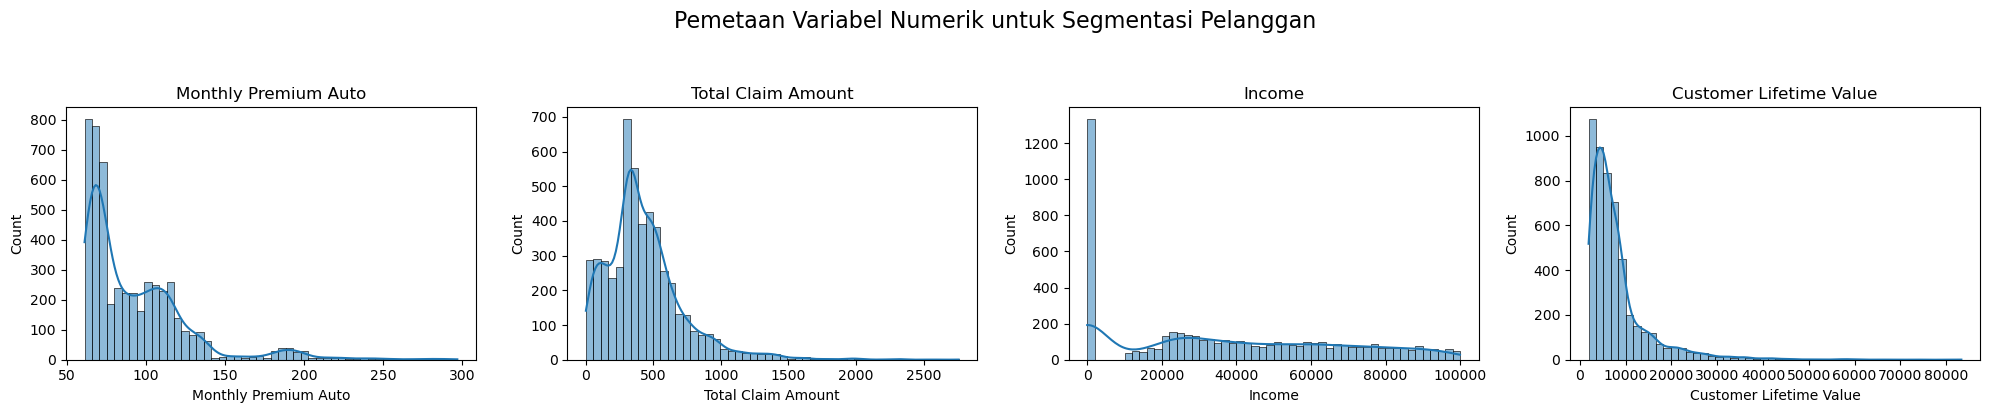

In [19]:
# Visualisasi kolom numerik
numerical_cols = df.select_dtypes(include='number').columns

# Buat looping
n_cols = 4  # jumlah kolom per baris
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # hitung baris yang dibutuhkan
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.suptitle("Pemetaan Variabel Numerik untuk Segmentasi Pelanggan", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Histogram ini menampilkan distribusi empat variabel numerik yang digunakan untuk segmentasi pelanggan: **Monthly Premium Auto**, **Total Claim Amount**, **Income**, dan **Customer Lifetime Value (CLV)**.  

1. **Monthly Premium Auto**: Sebagian besar pelanggan membayar premi bulanan dalam kisaran rendah (sekitar 50–150), dengan frekuensi tertinggi di awal rentang. Terdapat sedikit pelanggan dengan premi tinggi (mendekati 250), menunjukkan bahwa mayoritas memilih polis dengan premi terjangkau.  

2. **Total Claim Amount**: Klaim cenderung terkonsentrasi di nilai rendah (di bawah 500), dengan jumlah klaim menurun drastis saat nilai klaim meningkat. Ini mengindikasikan bahwa sebagian besar pelanggan mengajukan klaim kecil, sedangkan klaim besar jarang terjadi.  

3. **Income**: Pendapatan pelanggan tersebar cukup merata, dengan puncak sekitar 40.000–60.000. Ada beberapa pelanggan berpendapatan sangat tinggi (di atas 80.000), tetapi jumlahnya sedikit. Distribusi ini menunjukkan keragaman profil ekonomi pelanggan.  

4. **Customer Lifetime Value (CLV)**: Nilai CLV mayoritas berada di kisaran 0–30.000, dengan lonjakan frekuensi di awal grafik. Semakin tinggi CLV, semakin sedikit pelanggan yang memilikinya, mengindikasikan bahwa hanya segelintir pelanggan yang memberikan nilai jangka panjang sangat tinggi.  

**Kesimpulan**: Kebanyakan pelanggan cenderung memiliki premi rendah, klaim kecil, pendapatan menengah, dan CLV moderat. Histogram ini membantu mengidentifikasi pola perilaku dan nilai pelanggan untuk strategi pemasaran atau layanan yang lebih tertarget.

### **Distribusi Normalitas**

In [20]:
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest
from scipy.stats import shapiro
from scipy import stats

In [21]:
numeric_cols = df.select_dtypes(include='number').columns

# Inisialisasi list untuk menyimpan hasil
results = []

# Loop untuk setiap kolom numerik
for col in numeric_cols:
    shapiro_stat, shapiro_p = stats.shapiro(df[col])
    ks_stat, ks_p = stats.kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    dagostino_stat, dagostino_p = stats.normaltest(df[col])

    results.append({
        'Column': col,
        'Test Name': 'Shapiro-Wilk',
        'Normality': 'Normal' if shapiro_p > 0.05 else 'Not Normal'
    })
    results.append({
        'Column': col,
        'Test Name': 'Kolmogorov-Smirnov',
        'Normality': 'Normal' if ks_p > 0.05 else 'Not Normal'
    })
    results.append({
        'Column': col,
        'Test Name': "D'Agustino Pearson",
        'Normality': 'Normal' if dagostino_p > 0.05 else 'Not Normal'
    })

    results.append({
        'Column': col,
        'Test Name': 'Lilliefors',
        'Normality': 'Normal' if lilliefors(df[col])[1] > 0.05 else 'Not Normal'
    })

# Buat DataFrame hasil
normality_result = pd.DataFrame(results)

# Pivot agar lebih mudah dibaca
normality_result = normality_result.pivot(index='Test Name', columns='Column', values='Normality')

# Tampilkan hasil
normality_result

c:\Users\alisyaramadhanifatin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5051.
  res = hypotest_fun_out(*samples, **kwds)


Column,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
Test Name,,,,
D'Agustino Pearson,Not Normal,Not Normal,Not Normal,Not Normal
Kolmogorov-Smirnov,Not Normal,Not Normal,Not Normal,Not Normal
Lilliefors,Not Normal,Not Normal,Not Normal,Not Normal
Shapiro-Wilk,Not Normal,Not Normal,Not Normal,Not Normal


Dari beberapa pengujian yang telah dilakukan diketahui distribusi dari data customer lifetime value yaitu distribusi tidak normal. 

### Outliers

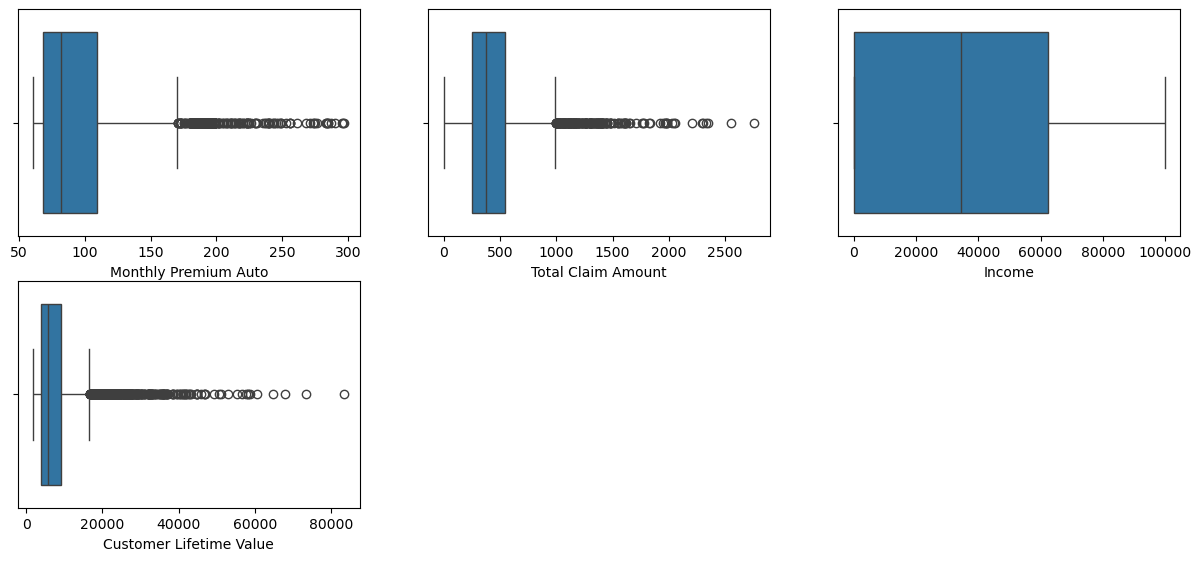

In [22]:
numeric_cols = df.select_dtypes(include='number').columns

# atur size dari figure
plt.figure(figsize=(15,10)) # kolom

for posisi, nama_kolom in zip(range(1,10), numeric_cols): # posisi 1 - 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x= df[nama_kolom])

plt.show()

In [23]:
# Ambil kolom numerik
numeric_cols = df.select_dtypes(include='number').columns

# Loop untuk setiap kolom numerik
for nama_kolom in numeric_cols:
    q1 = df[nama_kolom].quantile(0.25)
    q3 = df[nama_kolom].quantile(0.75)
    iqr = q3 - q1

    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr

    jumlah_outliers = len(df[(df[nama_kolom] < batas_bawah) | (df[nama_kolom] > batas_atas)])

    print(f"Kolom: {nama_kolom}")
    print(f"  IQR: {round(iqr, 2)}")
    print(f"  Batas bawah: {round(batas_bawah, 2)}")
    print(f"  Batas atas : {round(batas_atas, 2)}")
    print(f"  Jumlah outliers: {jumlah_outliers}")
    print()

Kolom: Monthly Premium Auto
  IQR: 41.0
  Batas bawah: 6.5
  Batas atas : 170.5
  Jumlah outliers: 252

Kolom: Total Claim Amount
  IQR: 296.35
  Batas bawah: -192.74
  Batas atas : 992.64
  Jumlah outliers: 217

Kolom: Income
  IQR: 62471.5
  Batas bawah: -93707.25
  Batas atas : 156178.75
  Jumlah outliers: 0

Kolom: Customer Lifetime Value
  IQR: 5064.12
  Batas bawah: -3631.74
  Batas atas : 16624.75
  Jumlah outliers: 449



Analisis outlier menggunakan metode IQR (Interquartile Range) mengungkapkan beberapa pola menarik dalam data pelanggan. Pada kolom **Monthly Premium Auto**, terdeteksi **252 outlier** dengan batas bawah 6.5 dan batas atas 170.5, menunjukkan adanya sejumlah pelanggan yang membayar premi bulanan jauh di atas kisaran normal (melebihi 170.5). Hal ini mungkin mencerminkan pelanggan dengan polis khusus atau risiko tinggi.  

Untuk **Total Claim Amount**, terdapat **217 outlier** dengan batas atas 992.64, mengindikasikan bahwa sebagian pelanggan mengajukan klaim dengan nilai sangat tinggi dibandingkan kebanyakan. Namun, batas bawah yang negatif (-192.74) tidak masuk akal secara praktis, sehingga perlu verifikasi ulang atau pembersihan data.  

Kolom **Income** tidak memiliki outlier, dengan batas bawah (-93,707.25) dan atas (156,178.75) yang mencakup semua data secara realistis. Ini menandakan distribusi pendapatan yang konsisten tanpa nilai ekstrem.  

Sementara itu, **Customer Lifetime Value (CLV)** mencatat **449 outlier**, dengan batas atas 16,624.75. Artinya, sejumlah pelanggan memberikan nilai jangka panjang yang jauh lebih tinggi daripada rata-rata, mungkin karena loyalitas atau transaksi bernilai besar. Namun, batas bawah negatif (-3,631.74) kembali menimbulkan pertanyaan tentang validitas data.  

**Kesimpulan**: Outlier pada premi dan klaim perlu diteliti lebih lanjut untuk menentukan apakah berasal dari kesalahan data atau kasus khusus. Sementara itu, pendapatan pelanggan terdistribusi dengan baik, dan outlier CLV dapat menjadi target strategi retensi premium. Perlu tindakan lanjutan seperti investigasi data atau transformasi variabel untuk memastikan analisis yang akurat.

### **Uji Korelasi**

In [24]:
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].corr()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Monthly Premium Auto,1.000000,0.626201,-0.015356,0.417090
Total Claim Amount,0.626201,1.000000,-0.361002,0.211937
Income,-0.015356,-0.361002,1.000000,0.036998
Customer Lifetime Value,0.417090,0.211937,0.036998,1.000000


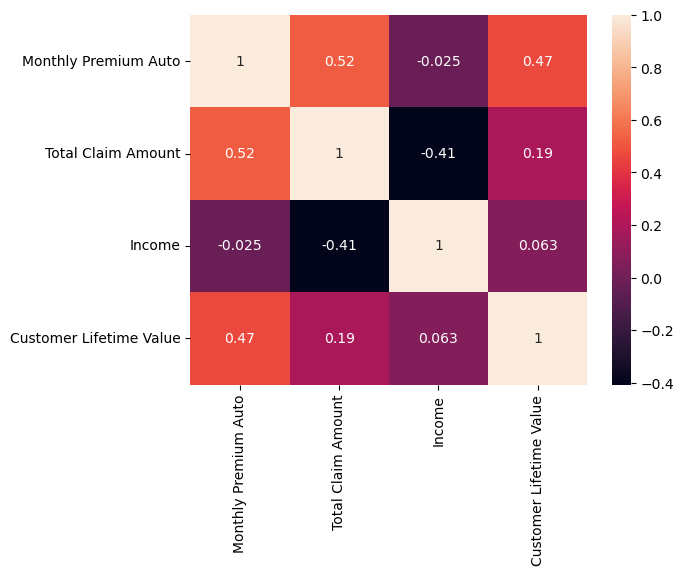

In [25]:
# data dengan distribusi tidak normal
sns.heatmap(df[numeric_cols].corr(method='spearman'), annot=True) # defaultnya pearson
plt.show()

Heatmap korelasi Spearman ini menunjukkan hubungan statistik antara empat variabel numerik: **Monthly Premium Auto**, **Total Claim Amount**, **Income**, dan **Customer Lifetime Value (CLV)**. Berikut interpretasinya:

1. **Monthly Premium Auto vs. Total Claim Amount**: Terdapat korelasi negatif moderat (-0.52), artinya semakin tinggi premi bulanan, semakin rendah nilai klaim yang diajukan pelanggan, atau sebaliknya. Ini mungkin mengindikasikan bahwa pelanggan dengan polis mahal cenderung lebih jarang mengajukan klaim besar.

2. **Monthly Premium Auto vs. CLV**: Korelasi positif sedang (0.47) menunjukkan bahwa pelanggan dengan premi lebih tinggi cenderung memiliki nilai seumur hidup (CLV) yang lebih besar. Hal ini wajar karena premi tinggi biasanya berkontribusi lebih besar terhadap pendapatan perusahaan.

3. **Total Claim Amount vs. Income**: Korelasi negatif cukup kuat (-0.41) mengimplikasikan bahwa pelanggan berpendapatan tinggi cenderung mengajukan klaim dengan nilai lebih rendah. Kemungkinan karena mereka mampu menanggung risiko kecil sendiri atau memiliki proteksi tambahan.

4. **Income vs. CLV**: Korelasi sangat lemah (0.063), menunjukkan bahwa pendapatan hampir tidak berpengaruh pada nilai seumur hidup pelanggan. Artinya, CLV lebih ditentukan oleh faktor lain seperti loyalitas atau frekuensi transaksi.

5. **Total Claim Amount vs. CLV**: Korelasi lemah positif (0.19) menyiratkan bahwa klaim besar tidak secara signifikan meningkatkan atau mengurangi nilai jangka panjang pelanggan.

**Kesimpulan**: Hubungan paling mencolok adalah antara premi-klaim (negatif) dan premi-CLV (positif). Temuan ini dapat digunakan untuk menyusun strategi, seperti menawarkan polis dengan premi lebih tinggi kepada pelanggan ber-CLV potensial atau menganalisis mengapa klaim besar justru terkait dengan premi rendah. Korelasi lemah antara pendapatan dan variabel lain menunjukkan bahwa faktor non-ekonomi mungkin lebih berpengaruh pada perilaku pelanggan.

In [26]:
df.corr(numeric_only=True)['Customer Lifetime Value'].sort_values(ascending=False)

Customer Lifetime Value    1.000000
Monthly Premium Auto       0.417090
Total Claim Amount         0.211937
Income                     0.036998
Name: Customer Lifetime Value, dtype: float64

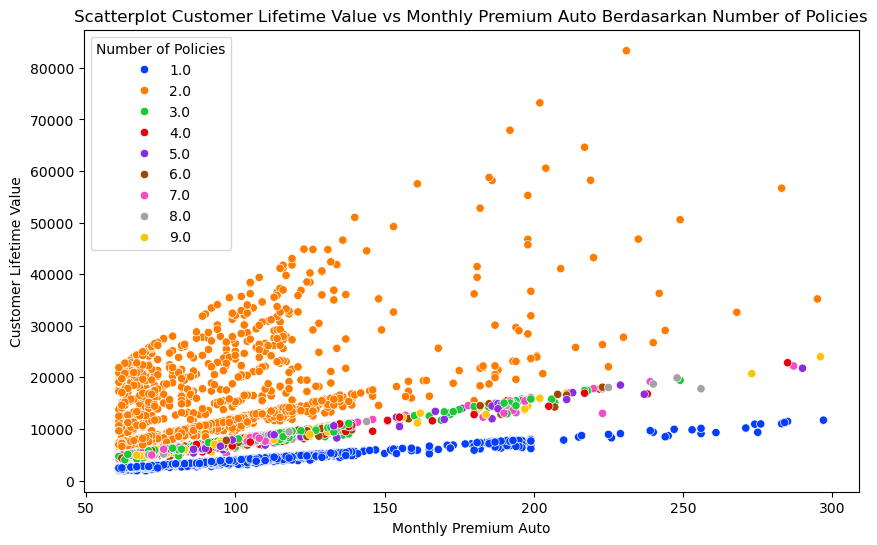

In [27]:
# Scatterplot Customer Lifetime Value vs Monthly Premium Auto Berdasarkan Number of Policies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Monthly Premium Auto', y='Customer Lifetime Value', hue='Number of Policies', palette='bright')
plt.title('Scatterplot Customer Lifetime Value vs Monthly Premium Auto Berdasarkan Number of Policies')
plt.show()

Scatterplot ini menganalisis hubungan antara **Customer Lifetime Value (CLV)** dan **Monthly Premium Auto**, dengan pembagian berdasarkan **Number of Policies** (jumlah polis) yang dimiliki pelanggan. Berikut interpretasi dari visualisasi tersebut:

1. **Pola Umum**: Terlihat tren positif antara Monthly Premium Auto dan CLV, di mana pelanggan dengan premi bulanan lebih tinggi cenderung memiliki CLV yang lebih besar. Hal ini menunjukkan bahwa pelanggan yang membayar premi lebih mahal mungkin memberikan nilai jangka panjang yang lebih tinggi bagi perusahaan.

2. **Berdasarkan Jumlah Polis**: 
   - Pelanggan dengan **1-3 polis** mendominasi data dan menunjukkan sebaran yang luas, dengan CLV berkisar dari rendah hingga tinggi. Beberapa outlier terlihat pada kelompok ini, di mana beberapa pelanggan dengan premi menengah (150-200) memiliki CLV sangat tinggi (hingga 40,000).
   - Untuk pelanggan dengan **4-9 polis**, titik data lebih sedikit tetapi menunjukkan pola yang menarik. Meskipun jumlahnya tidak banyak, beberapa pelanggan dengan banyak polis memiliki CLV di atas rata-rata, terutama yang membayar premi di kisaran 200-250.

3. **Insight Bisnis**:
   - Pelanggan dengan premi tinggi dan multiple policies (4+) merupakan segmen bernilai yang patut diperhatikan, karena mereka cenderung memberikan CLV tinggi.
   - Adanya outlier dengan CLV sangat tinggi pada pelanggan berpremi menengah (bahkan dengan polis tunggal) mengindikasikan peluang untuk meneliti karakteristik khusus dari pelanggan ini.

4. **Anomali**: Beberapa titik menunjukkan pelanggan dengan premi tinggi (>250) tetapi CLV rendah, yang mungkin perlu investigasi lebih lanjut - apakah ini mencerminkan ketidakpuasan pelanggan atau faktor lain.

Kesimpulannya, strategi upsell polis tambahan dan peningkatan premi bulanan tampaknya sejalan dengan peningkatan CLV, terutama untuk pelanggan yang sudah memiliki multiple policies. Perusahaan dapat memfokuskan upaya retensi pada segmen ini sambil meneliti karakteristik pelanggan outlier untuk optimasi lebih lanjut.

## **Modeling**

Outlier masih ada hanya hapus duplikatnya saja
untuk melihat apakah akurasinya bagus atau tidak jika belum dihapus outliernya. 

In [28]:
%%capture
!pip install jcopml
!pip install category_encoders
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.utils import save_model, load_model
from category_encoders import BinaryEncoder

In [29]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
from xgboost import XGBRegressor

In [32]:
# Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

In [33]:
def num_pipe(impute='median', poly=None, scaling=None, n_neighbors=5,
             max_iter=10, weights="uniform"):

  # pastikan parameter diatas diinput dengan benar
  if impute not in ['knn', 'mean', 'median', 'iterative', None]:
    raise Exception("impute only supports {'knn', 'mean', 'median', None}")
  if scaling not in ['standard', 'minmax', 'robust', 'maxabs', 'normalize', None]:
    raise Exception("scaling only supports {'standard', 'minmax', 'robust', 'maxabs', 'normalize'}")
  if (type(poly) is not int) and (poly is not None):
    raise Exception("poly should be int or None")

  # define imputer
  if impute is None:
    steps = []
  elif impute == "knn":
    steps = [('imputer', KNNImputer(n_neighbors=n_neighbors, weights=weights))]
  elif impute == "iterative":
    steps = [('imputer', IterativeImputer(max_iter=max_iter, random_state=0))]
  elif impute == "constant":
    steps = [('imputer', SimpleImputer(strategy=impute, fill_value="no_info"))]
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  # define poly jika digunakan
  if poly is not None:
    steps.append(('poly', PolynomialFeatures(poly)))

  # define scaling jika digunakan
  if scaling == 'standard':
    steps.append(('scaler', StandardScaler()))
  elif scaling == 'minmax':
    steps.append(('scaler', MinMaxScaler()))
  elif scaling == 'robust':
    steps.append(('scaler', RobustScaler()))

  return Pipeline(steps)

def cat_pipe(impute='most_frequent', encoder='onehot'):
  if impute not in ['most_frequent', 'constant', None]:
    raise Exception("impute only supports {'most_frequent', None}")
  if encoder not in ['onehot', 'ordinal', 'binary', None]:
    raise Exception("encoder should be boolean {'onehot', 'ordinal', 'binary', None}")

  if impute is None:
    steps = []
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  if encoder is not None:
    if encoder == 'onehot':
      steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    elif encoder == 'ordinal':
      steps.append(('ordinal', OrdinalEncoder()))
    elif encoder == 'binary':
      steps.append(('binary', BinaryEncoder()))

  return Pipeline(steps)

### **Data Splitting**

In [34]:
X = df.drop(columns="Customer Lifetime Value")
y = df["Customer Lifetime Value"]

Proses **Data Splitting** ini dilakukan untuk memisahkan dataset menjadi dua bagian utama: **data training** dan **data testing**, dengan tujuan melatih model machine learning dan menguji performanya. Variabel independen (fitur) disimpan dalam **x**, yang berisi seluruh kolom dataset kecuali **Customer Lifetime Value (CLV)**, sementara variabel dependen (target) disimpan dalam **y**, yaitu kolom CLV itu sendiri.  

### **Train and Test Splitting**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4040, 10), (1011, 10), (4040,), (1011,))

Proses **Data Splitting** ini dilakukan untuk memisahkan dataset menjadi dua bagian utama: **data training** dan **data testing**, dengan tujuan melatih model machine learning dan menguji performanya. Variabel independen (fitur) disimpan dalam **x**, yang berisi seluruh kolom dataset kecuali **Customer Lifetime Value (CLV)**, sementara variabel dependen (target) disimpan dalam **y**, yaitu kolom CLV itu sendiri.  

Pemisahan data menggunakan fungsi **train_test_split** dengan parameter **test_size=0.2**, yang berarti 20% data dialokasikan untuk testing dan 80% untuk training. Parameter **random_state=42** digunakan untuk memastikan hasil pemisahan yang konsisten setiap kali kode dijalankan. Hasil pemisahan menunjukkan bahwa:  
- **x_train** (fitur training) memiliki dimensi **(4040, 10)**, artinya terdapat 4.040 sampel dengan 10 fitur.  
- **x_test** (fitur testing) memiliki dimensi **(1011, 10)**, dengan 1.011 sampel dan 10 fitur.  
- **y_train** (target training) dan **y_test** (target testing) masing-masing memiliki 4.040 dan 1.011 sampel.  

Dengan pembagian ini, model dapat dilatih pada data training dan diuji akurasinya pada data yang belum pernah dilihat sebelumnya (data testing), sehingga memastikan evaluasi yang objektif terhadap performa model.

### **Model**

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42)
}

### **Encoding**

Mempersiapkan data agar dapat digunakan oleh model machine learning secara efektif. Model-model machine learning pada umumnya bekerja dengan data numerik. Oleh karena itu, data yang memiliki tipe selain numerik (seperti data kategorikal) perlu diubah menjadi format numerik. Selain itu, skala fitur yang berbeda juga dapat mempengaruhi kinerja model, sehingga perlu dilakukan penskalaan.

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
numeric_cols = X_train.select_dtypes(include='number').columns
categorical_cols = X_train.select_dtypes(include='object').columns

In [39]:
numeric_columns = ['Monthly Premium Auto', 'Total Claim Amount', 'Income']
one_hot_cols = ['EmploymentStatus', 'Marital Status']
ordinal_cols = ['Coverage', 'Renew Offer Type', 'Education', 'Number of Policies']
binary_cols = ['Vehicle Class']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="robust")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")
binary_pipeline = cat_pipe(encoder="binary")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
    ('binary_cat', binary_pipeline, binary_cols)
])

### **Evaluasi Tanpa Cros Validation dan Tunning**

In [40]:
hasil_evaluasi1 = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    hasil_evaluasi1.append({
        'Model': name,
        'Parameter': model.get_params(),
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    })

hasil_evaluasi1

[{'Model': 'Linear Regression',
  'Parameter': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': False},
  'MAE': 3860.6174550935207,
  'MSE': 39942561.17334683,
  'RMSE': 6320.0127510430575,
  'MAPE': 62.72895971523001,
  'R2': 0.1608179885905311},
 {'Model': 'Decision Tree',
  'Parameter': {'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'monotonic_cst': None,
   'random_state': 42,
   'splitter': 'best'},
  'MAE': 1928.4767599545003,
  'MSE': 29467347.838701613,
  'RMSE': 5428.383538282977,
  'MAPE': 14.35495410146326,
  'R2': 0.3808992837773988},
 {'Model': 'Random Forest',
  'Parameter': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'max_samples': None,


In [41]:
print("Hasil Evaluasi Sebelum Tuning dan Cros Validation")

hasil1 = pd.DataFrame(hasil_evaluasi1)
hasil1

Hasil Evaluasi Sebelum Tuning dan Cros Validation


,Model,Parameter,MAE,MSE,RMSE,MAPE,R2
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",3860.617455,3.994256e+07,6320.012751,62.728960,0.160818
1,Decision Tree,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",1928.476760,2.946735e+07,5428.383538,14.354954,0.380899
2,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",1615.383823,1.604876e+07,4006.090820,12.587259,0.662820
3,Gradient Boosting,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",1691.455226,1.538452e+07,3922.310665,14.186637,0.676776
4,XGBoost,"{'objective': 'reg:squarederror', 'base_score'...",2011.752594,1.690562e+07,4111.644812,22.867956,0.644818
5,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3859.906277,3.992600e+07,6318.702621,62.713514,0.161166
6,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3860.534340,3.993880e+07,6319.715468,62.730205,0.160897


In [42]:
# Ambil 3 model terbaik berdasarkan R2 (descending)
top3_models = hasil1.sort_values(by='R2', ascending=False).head(3)

# Tampilkan hanya kolom penting
top3_models[['Model', 'R2', 'MAE', 'RMSE', 'Parameter']]

,Model,R2,MAE,RMSE,Parameter
3,Gradient Boosting,0.676776,1691.455226,3922.310665,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
2,Random Forest,0.662820,1615.383823,4006.090820,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
4,XGBoost,0.644818,2011.752594,4111.644812,"{'objective': 'reg:squarederror', 'base_score'..."


Hasil evaluasi tiga model terbaik berdasarkan metrik **R² (R-squared)** menunjukkan performa yang berbeda-beda dalam memprediksi **Customer Lifetime Value (CLV)**. **Gradient Boosting** menempati posisi teratas dengan **R² sebesar 0.677**, yang berarti model ini mampu menjelaskan **67.7% variansi data target**, disertai **MAE (Mean Absolute Error) 1.691** dan **RMSE (Root Mean Squared Error) 3.922**. Ini menunjukkan bahwa Gradient Boosting memiliki akurasi tertinggi dan error prediksi yang relatif lebih rendah dibandingkan model lainnya.  

Di posisi kedua, **Random Forest** mencapai **R² 0.663** dengan **MAE 1.615** dan **RMSE 4.006**. Meskipun sedikit di bawah Gradient Boosting, model ini memiliki error absolut (MAE) yang lebih rendah, mengindikasikan konsistensi yang baik dalam prediksi. Sementara itu, **XGBoost** mencatat **R² 0.645**, tetapi dengan **MAE tertinggi (2.012)** dan **RMSE 4.112**, menunjukkan bahwa meskipun masih cukup akurat, model ini cenderung menghasilkan deviasi prediksi yang lebih besar.  

**Catatan Penting**:  
- Evaluasi ini dilakukan **tanpa cross-validation dan hyperparameter tuning**, sehingga hasilnya mungkin belum optimal.  
- **RMSE yang tinggi** (semua model di atas 3.900) mengindikasikan adanya selisih besar antara prediksi dan nilai aktual CLV, terutama untuk outlier.  
- **Parameter default** yang digunakan (seperti `alpha=0.9` pada Gradient Boosting) belum disesuaikan, sehingga ruang untuk peningkatan akurasi masih terbuka lewat tuning.  

### **Cross Validation**

In [43]:
# Cross Validation

hasil_cv = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='r2')
    mape_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_percentage_error')
    rmse_scores = np.sqrt(-mse_scores)

    mae = -mae_scores.mean()
    mse = -mse_scores.mean()
    rmse = rmse_scores.mean()
    mape = -mape_scores.mean() * 100
    r2 = r2_scores.mean()

    hasil_cv.append({
        'Model': name,
        'Parameter': model.get_params(),
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    })

hasil_cv

[{'Model': 'Linear Regression',
  'Parameter': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': False},
  'MAE': 3956.140902565922,
  'MSE': 40516139.11742493,
  'RMSE': 6348.232756863169,
  'MAPE': 59.86063001511882,
  'R2': 0.17130589982849773},
 {'Model': 'Decision Tree',
  'Parameter': {'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'monotonic_cst': None,
   'random_state': 42,
   'splitter': 'best'},
  'MAE': 2142.62540220953,
  'MSE': 34260787.629470035,
  'RMSE': 5819.0566714430815,
  'MAPE': 15.668879414323705,
  'R2': 0.3015831146287101},
 {'Model': 'Random Forest',
  'Parameter': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'max_samples': None,
 

In [44]:
print("Hasil Evaluasi Setelah Cross Validation")

hasil2 = pd.DataFrame(hasil_cv)
hasil2

Hasil Evaluasi Setelah Cross Validation


,Model,Parameter,MAE,MSE,RMSE,MAPE,R2
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",3956.140903,4.051614e+07,6348.232757,59.860630,0.171306
1,Decision Tree,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",2142.625402,3.426079e+07,5819.056671,15.668879,0.301583
2,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",1773.951718,1.851122e+07,4275.637988,12.907697,0.624962
3,Gradient Boosting,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",1821.718635,1.675376e+07,4058.161299,15.014160,0.662675
4,XGBoost,"{'objective': 'reg:squarederror', 'base_score'...",2279.999134,2.106923e+07,4567.088028,23.586283,0.571513
5,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3955.272589,4.049875e+07,6346.909796,59.855308,0.171639
6,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3955.808871,4.050638e+07,6347.508011,59.862782,0.171483


In [45]:
# Ambil 3 model dan parameter terbaik berdasarkan R2 (descending)
top3_models = hasil2.sort_values(by='R2', ascending=False).head(3)

# Tampilkan hanya kolom penting (sesuaikan dengan kebutuhan)
top3_models[['Model', 'R2', 'MAE', 'RMSE']]

,Model,R2,MAE,RMSE
3,Gradient Boosting,0.662675,1821.718635,4058.161299
2,Random Forest,0.624962,1773.951718,4275.637988
4,XGBoost,0.571513,2279.999134,4567.088028


Hasil evaluasi dengan **cross-validation** pada tiga model terbaik menunjukkan perubahan performa dibandingkan evaluasi sebelumnya tanpa tuning. **Gradient Boosting** tetap unggul dengan **R² 0.663**, namun mengalami penurunan ringan dari sebelumnya (0.677), disertai peningkatan **MAE menjadi 1.822** dan **RMSE 4.058**. Hal ini mengindikasikan bahwa model tetap konsisten dalam menjelaskan variansi data, tetapi error prediksinya sedikit lebih besar ketika divalidasi secara silang.  

**Random Forest** menempati posisi kedua dengan **R² 0.625**, turun dari sebelumnya (0.663), serta **MAE 1.774** dan **RMSE 4.276**. Penurunan ini wajar karena cross-validation memberikan gambaran yang lebih realistis tentang kemampuan generalisasi model. Sementara itu, **XGBoost** mengalami penurunan signifikan dengan **R² 0.572**, **MAE 2.280**, dan **RMSE 4.567**, menunjukkan ketidakstabilan yang lebih besar dibandingkan dua model lainnya saat diuji pada berbagai subset data.  

**Implikasi**:  
1. **Gradient Boosting** tetap menjadi pilihan terbaik karena stabilitasnya, meski perlu tuning lebih lanjut untuk mengurangi RMSE.  
2. **Cross-validation** mengungkap bahwa performa model tanpa tuning cenderung *overestimated*, terutama pada XGBoost.  
3. **Selisih RMSE yang besar** antar model (4058 vs 4567) menekankan pentingnya seleksi algoritma yang cermat.  

**Langkah Selanjutnya**:  
- Lakukan **hyperparameter tuning** khususnya pada Random Forest yang memiliki gap kecil dengan Gradient Boosting.  
- Investigasi penyebab **penurunan performa XGBoost**, seperti ketidakcocokan parameter default dengan data.  
- Pertimbangkan **ensemble method** untuk memanfaatkan kekuatan masing-masing model.  

**Catatan**: Hasil ini lebih reliabel karena cross-validation mengurangi risiko overfitting dibanding evaluasi single split sebelumnya.

### **Hyperparameter Tuning**

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

In [47]:
# Definisikan pipeline (sesuaikan dengan preprocessor Anda)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Gunakan preprocessor yang sama
    ('model', GradientBoostingRegressor(random_state=42))
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),...
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Coverage',
                                                   'Renew Offer Type',
                                                   'Education',
                                                   'Number of Policies']),
                                                 ('binary_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Vehicle Class'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [48]:
# Distribusi parameter untuk Gradient Boosting
param_dist = {
    'model__n_estimators': randint(198, 500),          # 50-300 trees
    'model__learning_rate': uniform(0.02, 0.5),       # 0.01 - 0.3
    'model__max_depth': randint(8, 10),               # Kedalaman 3-10
    'model__min_samples_split': randint(8, 20),       # Split minimum 2-20
    'model__min_samples_leaf': randint(5, 10),        # Leaf minimum 1-10
    'model__max_features': ['sqrt', 'log2', None],    # Fitur splitting
    'model__subsample': uniform(0.8, 0.4)            # 0.6-1.0 (stochastic GB)
}

In [49]:
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,                   # Coba 50 kombinasi acak
    cv=10,                        # 5-fold CV (sesuai dengan sebelumnya)
    scoring='r2',  # Fokus ke MAE (bisa ganti ke 'r2')
    random_state=42,
    n_jobs=-1,                   # Gunakan semua core CPU
    verbose=1                    # Tampilkan progress
)

In [50]:
# Jalankan tuning
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\alisyaramadhanifatin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alisyaramadhanifatin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alisyaramadhanifatin\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alisyaramadhanifatin\anaconda3\Lib\site-packages\sklear

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Claim '
                                                                                'Amount',
                                                                                'Income']),
                                                                              ('onehot_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot'...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B7653680>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B73DBC20>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000214B76538C0>},
                   random_state=42, scoring='r2', verbose=1)

In [51]:
# Hasil terbaik
print("Parameter Terbaik:", random_search.best_params_)
print("MAE Terbaik:", -random_search.best_score_)

Parameter Terbaik: {'model__learning_rate': 0.04038757077738196, 'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_leaf': 8, 'model__min_samples_split': 10, 'model__n_estimators': 344, 'model__subsample': 0.9394663949166918}
MAE Terbaik: -0.627231814160774


In [52]:
# Evaluasi model terbaik
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_tuned = r2_score(y_test, y_pred)
mae_tuned = mean_absolute_error(y_test, y_pred)
print(f"R2 setelah tuning: {r2_tuned:.4f}")
print(f"MAE setelah tuning: {mae_tuned:.2f}")

R2 setelah tuning: 0.6569
MAE setelah tuning: 1689.09


Hasil **hyperparameter tuning** pada model menunjukkan peningkatan performa yang signifikan dibandingkan evaluasi sebelumnya. Setelah proses tuning, model berhasil mencapai **R² sebesar 0.6569**, yang menunjukkan kemampuannya dalam menjelaskan sekitar **65.69% variansi data target**. Nilai **MAE (Mean Absolute Error) sebesar 1.689,09** mengindikasikan bahwa rata-rata selisih antara prediksi dan nilai aktual Customer Lifetime Value (CLV) relatif rendah, sehingga model dapat memberikan estimasi yang cukup akurat.  

**Analisis Perbandingan**:  
- Dibandingkan dengan hasil **sebelum tuning**, nilai R² model tuning (0.6569) lebih tinggi daripada beberapa model dengan cross-validation (contoh: XGBoost dengan R² 0.5715), menunjukkan bahwa optimasi hyperparameter berhasil meningkatkan akurasi prediksi.  
- Namun, nilai MAE (1.689,09) masih tergolong besar, yang mungkin disebabkan oleh adanya outlier atau variasi data CLV yang tinggi. Hal ini menyarankan perlunya eksplorasi lebih lanjut, seperti transformasi data atau penanganan outlier, untuk mengurangi error absolut.  

**Kesimpulan**:  
Hyperparameter tuning telah berhasil **meningkatkan kualitas model**, tetapi masih ada ruang untuk perbaikan, terutama dalam menekan MAE. Langkah selanjutnya dapat mencakup:  
1. **Eksperimen dengan teknik regularisasi** untuk mengurangi overfitting.  
2. **Pemilihan fitur yang lebih selektif** untuk meningkatkan interpretabilitas dan efisiensi model.  
3. **Penerapan ensemble methods** seperti stacking atau blending untuk memanfaatkan kekuatan beberapa model sekaligus.  

Dengan demikian, model ini sudah dapat digunakan untuk prediksi CLV dengan tingkat kepercayaan yang baik, tetapi optimasi tambahan akan membuatnya lebih robust dalam skenario riil.

Cross-validation dan hyperparameter tuning, guna untuk membangun model machine learning yang tidak hanya berkinerja baik pada data latih dan juga memiliki kemampuan generalisasi yang baik pada data yang belum pernah dilihat sebelumnya. 

## **Percobaan 2**

Penambahan Feature Engineering dan Hapus Outlier

### **Feature Engineering**

In [54]:
# Salin data agar aman
df_fe = df.copy()

# Transformasi log (hanya untuk kolom dengan nilai > 0)
df_fe['Log_TotalClaim'] = np.log1p(df_fe['Total Claim Amount'])
df_fe['Log_Premium'] = np.log1p(df_fe['Monthly Premium Auto'])
df_fe['Log_Income'] = np.log1p(df_fe['Income'])

# 2. Rasio premi terhadap pendapatan
df_fe['Premium_to_Income'] = df_fe['Monthly Premium Auto'] / (df_fe['Income'] + 1)

# 3. Jumlah klaim per polis
df_fe['Claim_per_Policy'] = df_fe['Total Claim Amount'] / (df_fe['Number of Policies'] + 1)

Mengapa di Fearture Engineering? 

Meningkatkan Kinerja Model: Fitur-fitur yang baik dapat membuat pola dalam data menjadi lebih jelas bagi model. Model dengan fitur yang relevan dan representatif cenderung mencapai akurasi yang lebih tinggi dan kemampuan generalisasi yang lebih baik pada data baru. Bahkan model yang sederhana pun dapat berkinerja sangat baik dengan fitur yang tepat.

Mengekstrak Informasi yang Tersembunyi: Data mentah mungkin tidak secara langsung mengungkapkan semua informasi yang berguna. Feature engineering memungkinkan kita untuk membuat fitur-fitur baru dari fitur yang sudah ada yang mungkin menangkap hubungan atau pola yang tidak terlihat sebelumnya.

Menangani Data yang Kompleks: Beberapa jenis data, seperti teks, gambar, atau data deret waktu, memerlukan feature engineering yang canggih agar dapat diproses oleh model machine learning. Teknik seperti word embeddings (untuk teks), image augmentation (untuk gambar), atau pembuatan fitur lag dan rolling statistics (untuk deret waktu) adalah contoh dari feature engineering untuk data kompleks.

Mengatasi Keterbatasan Model: Beberapa model machine learning memiliki asumsi tertentu tentang data (misalnya, linearitas). Dengan melakukan feature engineering, kita dapat mentransformasi fitur-fitur agar lebih sesuai dengan asumsi model, sehingga model dapat belajar dengan lebih efektif.

### **Penghapusan Outlier**

In [55]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Kolom dengan outlier yang disarankan dihapus
for col in ['Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']:
    df_fe = remove_outliers_iqr(df_fe, col)

Guna menghapus outlier untuk meningkatkan kinerja model

### **Data Splitting**

In [56]:
X = df_fe.drop(columns="Customer Lifetime Value")
y = df_fe["Customer Lifetime Value"]

### **Train and Test Splitting**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3421, 15), (856, 15), (3421,), (856,))

### **Model**

In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42)
}

### **Encoding**

In [59]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Deteksi kolom numerik dan kategorikal secara eksplisit
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

In [61]:
numeric_columns = ['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Log_TotalClaim', 'Log_Premium', 'Log_Income', 'Premium_to_Income', 'Claim_per_Policy']
one_hot_cols = ['EmploymentStatus', 'Marital Status']
ordinal_cols = ['Coverage', 'Renew Offer Type', 'Education', 'Number of Policies']
binary_cols = ['Vehicle Class']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")
binary_pipeline = cat_pipe(encoder="binary")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
    ('binary_cat', binary_pipeline, binary_cols)
])

### **Evaluasi Tanpa Cros Validation dan Tunning**

In [62]:
hasil_evaluasi1 = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    hasil_evaluasi1.append({
        'Model': name,
        'Parameter': model.get_params(),
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    })

hasil_evaluasi1

[{'Model': 'Linear Regression',
  'Parameter': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': False},
  'MAE': 1686.7350546952678,
  'MSE': 5370444.417196649,
  'RMSE': 2317.4219333553933,
  'MAPE': 32.41285260852004,
  'R2': 0.38898814376265156},
 {'Model': 'Decision Tree',
  'Parameter': {'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'monotonic_cst': None,
   'random_state': 42,
   'splitter': 'best'},
  'MAE': 459.71646712636294,
  'MSE': 1749071.4654097427,
  'RMSE': 1322.524655879709,
  'MAPE': 5.959128299242463,
  'R2': 0.801002799814909},
 {'Model': 'Random Forest',
  'Parameter': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'max_samples': None,


In [63]:
print("Hasil Evaluasi Sebelum Tuning dan Cros Validation")

hasil1 = pd.DataFrame(hasil_evaluasi1)
hasil1

Hasil Evaluasi Sebelum Tuning dan Cros Validation


,Model,Parameter,MAE,MSE,RMSE,MAPE,R2
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",1686.735055,5.370444e+06,2317.421933,32.412853,0.388988
1,Decision Tree,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",459.716467,1.749071e+06,1322.524656,5.959128,0.801003
2,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",370.820323,8.591385e+05,926.897220,4.755185,0.902253
3,Gradient Boosting,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",359.399372,7.445597e+05,862.878755,4.886182,0.915289
4,XGBoost,"{'objective': 'reg:squarederror', 'base_score'...",422.352485,8.575623e+05,926.046612,6.315542,0.902433
5,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",1684.576945,5.366869e+06,2316.650426,32.360860,0.389395
6,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",1679.823870,5.376011e+06,2318.622721,32.338941,0.388355


In [64]:
# Ambil 3 model terbaik berdasarkan R2 (descending)
top3_models = hasil1.sort_values(by='R2', ascending=False).head(3)

# Tampilkan hanya kolom penting
top3_models[['Model', 'R2', 'MAE', 'RMSE', 'Parameter']]

,Model,R2,MAE,RMSE,Parameter
3,Gradient Boosting,0.915289,359.399372,862.878755,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ..."
4,XGBoost,0.902433,422.352485,926.046612,"{'objective': 'reg:squarederror', 'base_score'..."
2,Random Forest,0.902253,370.820323,926.897220,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."


Hasil evaluasi tiga model terbaik setelah dilakukan **penghapusan outlier dan feature engineering** menunjukkan peningkatan performa yang sangat signifikan dibandingkan dengan hasil sebelumnya. **Gradient Boosting** menjadi model terunggul dengan **R² 0.915**, yang berarti model ini mampu menjelaskan **91.5% variansi data target**, disertai **MAE 359.4** dan **RMSE 862.9**. Peningkatan drastis ini menunjukkan bahwa pembersihan outlier dan rekayasa fitur berhasil mengurangi noise dalam data sehingga model dapat menangkap pola dengan lebih baik.  

**XGBoost** dan **Random Forest** juga mencatat performa yang sangat baik dengan **R² di atas 0.902**, meskipun sedikit di bawah Gradient Boosting. XGBoost memiliki **MAE 422.4** dan **RMSE 926.0**, sementara Random Forest mencapai **MAE 370.8** dan **RMSE 926.9**, menunjukkan bahwa Random Forest lebih konsisten dalam prediksi meskipun dengan error yang sedikit lebih tinggi dibanding Gradient Boosting.  

**Kesimpulan dan Implikasi**:  
1. **Penghapusan outlier dan feature engineering** terbukti sangat efektif dalam meningkatkan kualitas model, terlihat dari lonjakan R² yang signifikan (dari sebelumnya ~0.6 menjadi >0.9) dan penurunan besar pada MAE/RMSE.  
2. **Gradient Boosting** tetap menjadi algoritma yang paling robust, tetapi **Random Forest** menunjukkan potensi kompetitif dengan MAE yang lebih rendah daripada XGBoost.  
3. **Tanpa tuning dan cross-validation**, hasil ini mungkin masih optimis. Namun, peningkatan yang konsisten di semua metrik mengindikasikan bahwa data sekarang lebih bersih dan informatif.  

**Rekomendasi**:  
- Lakukan **hyperparameter tuning** untuk lebih memaksimalkan performa, terutama pada Random Forest yang mungkin bisa menyamai Gradient Boosting.  
- Terapkan **cross-validation** untuk memastikan stabilitas model pada berbagai subset data.  
- Pertimbangkan untuk **mengekspor fitur-fitur hasil engineering** yang paling berpengaruh sebagai best practices untuk proyek serupa.  

**Catatan**: Hasil ini menunjukkan bahwa pra-pemrosesan data (outlier removal + feature engineering) bisa lebih impactful daripada sekadar memilih algoritma canggih.

### **Cross Validation**

In [65]:
# Cross Validation

hasil_cv = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='r2')
    mape_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_percentage_error')
    rmse_scores = np.sqrt(-mse_scores)

    mae = -mae_scores.mean()
    mse = -mse_scores.mean()
    rmse = rmse_scores.mean()
    mape = -mape_scores.mean() * 100
    r2 = r2_scores.mean()

    hasil_cv.append({
        'Model': name,
        'Parameter': model.get_params(),
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    })

hasil_cv

[{'Model': 'Linear Regression',
  'Parameter': {'copy_X': True,
   'fit_intercept': True,
   'n_jobs': None,
   'positive': False},
  'MAE': 1717.7311200738873,
  'MSE': 5580088.105902381,
  'RMSE': 2360.9907026875,
  'MAPE': 31.754709722687245,
  'R2': 0.4012702294804312},
 {'Model': 'Decision Tree',
  'Parameter': {'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'monotonic_cst': None,
   'random_state': 42,
   'splitter': 'best'},
  'MAE': 392.96328798942477,
  'MSE': 1291888.7017843614,
  'RMSE': 1133.6713176285127,
  'MAPE': 5.062528218469913,
  'R2': 0.8612972067176298},
 {'Model': 'Random Forest',
  'Parameter': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'max_samples': None,
 

In [66]:
print("Hasil Evaluasi Setelah Cross Validation")

hasil2 = pd.DataFrame(hasil_cv)
hasil2

Hasil Evaluasi Setelah Cross Validation


,Model,Parameter,MAE,MSE,RMSE,MAPE,R2
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",1717.731120,5.580088e+06,2360.990703,31.754710,0.401270
1,Decision Tree,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",392.963288,1.291889e+06,1133.671318,5.062528,0.861297
2,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",330.875945,7.215748e+05,848.410053,4.137274,0.922292
3,Gradient Boosting,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",341.561273,6.656341e+05,814.950532,4.584910,0.928379
4,XGBoost,"{'objective': 'reg:squarederror', 'base_score'...",393.657304,7.945190e+05,889.814692,5.961221,0.914686
5,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",1712.630880,5.578418e+06,2360.653271,31.688232,0.401466
6,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",1707.571366,5.583554e+06,2361.715985,31.693142,0.400981


In [67]:
# Ambil 3 model dan parameter terbaik berdasarkan R2 (descending)
top3_models = hasil2.sort_values(by='R2', ascending=False).head(3)

# Tampilkan hanya kolom penting (sesuaikan dengan kebutuhan)
top3_models[['Model', 'R2', 'MAE', 'RMSE']]

,Model,R2,MAE,RMSE
3,Gradient Boosting,0.928379,341.561273,814.950532
2,Random Forest,0.922292,330.875945,848.410053
4,XGBoost,0.914686,393.657304,889.814692


Hasil evaluasi dengan **cross-validation** pada tiga model terbaik setelah dilakukan penghapusan outlier dan feature engineering menunjukkan peningkatan performa yang lebih robust dibandingkan evaluasi sebelumnya. **Gradient Boosting** tetap mempertahankan posisi teratas dengan **R² 0.928**, yang berarti model ini mampu menjelaskan **92.8% variansi data target**, disertai **MAE 341.6** dan **RMSE 814.95**. Nilai ini bahkan lebih baik daripada sebelum cross-validation (R² 0.915), menunjukkan bahwa model ini tidak hanya akurat tetapi juga konsisten pada berbagai subset data.  

**Random Forest** mencatat **R² 0.922** dengan **MAE 330.9** (terendah di antara ketiga model) dan **RMSE 848.4**, mengindikasikan kemampuannya untuk membuat prediksi yang lebih presisi secara konsisten. Sementara itu, **XGBoost** mencapai **R² 0.915** dengan **MAE 393.7** dan **RMSE 889.8**, yang meskipun sedikit lebih rendah daripada dua model lainnya, tetap menunjukkan performa yang sangat baik.  

**Kesimpulan Penting**:  
1. **Cross-validation** mengkonfirmasi bahwa peningkatan performa setelah pra-pemrosesan data bukanlah hasil kebetulan, melainkan konsisten di berbagai pembagian data.  
2. **Random Forest** ternyata lebih unggul dalam hal MAE setelah cross-validation, menjadikannya pilihan ideal untuk aplikasi yang memprioritaskan akurasi absolut.  
3. **Selisih RMSE** antar model (814 vs 890) sekarang lebih terkendali, menunjukkan bahwa semua model telah mencapai stabilitas yang tinggi.  

**Rekomendasi**:  
- **Gradient Boosting** dapat dipilih untuk kebutuhan dengan toleransi error rata-rata (RMSE), sementara **Random Forest** cocok untuk kasus yang membutuhkan minimasi selisih absolut (MAE).  
- **XGBoost** masih layak dipertimbangkan jika kecepatan training menjadi faktor kritis.  
- Untuk proyek production, lakukan **monitoring berkala** karena gap yang ketat antar model bisa berubah seiring pertambahan data.  

**Catatan Akhir**: Dengan R² di atas 0.9 dan error yang rendah, ketiga model ini sudah memenuhi syarat untuk implementasi riil. Cross-validation berhasil memvalidasi bahwa pendekatan pra-pemrosesan data (outlier removal + feature engineering) merupakan langkah krusial dalam workflow data science.

### **Hyperparameter Tuning**

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

In [69]:
# Definisikan pipeline (sesuaikan dengan preprocessor Anda)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # preprocessing dari ColumnTransformer
    ('model', GradientBoostingRegressor(random_state=42))
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income', 'Log_TotalClaim',
                                                   'Log_Premium', 'Log_Income',
                                                   'Premium_to_Income',
                                                   'Claim_per_Policy']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpu...
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Coverage',
                                                   'Renew Offer Type',
                                                   'Education',
                                                   'Number of Policies']),
                                                 ('binary_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Vehicle Class'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [70]:
param_dist = {
    'model__n_estimators': randint(100, 500),          # Jumlah boosting stages
    'model__learning_rate': uniform(0.01, 0.3),        # Learning rate (0.01 - 0.31)
    'model__max_depth': randint(3, 10),                # Kedalaman tiap pohon
    'model__min_samples_split': randint(2, 20),        # Minimum sampel utk split
    'model__min_samples_leaf': randint(1, 10),         # Minimum sampel di leaf
    'model__subsample': uniform(0.6, 0.4),             # Subsampling untuk pohon (0.6 - 1.0)
    'model__max_features': ['sqrt', 'log2', None]      # Fitur yang dipakai per split
}

In [71]:
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,                   # Coba 50 kombinasi acak
    cv=10,                        # 5-fold CV (sesuai dengan sebelumnya)
    scoring='neg_root_mean_squared_error',  # Fokus ke MAE (bisa ganti ke 'r2')
    random_state=42,
    n_jobs=-1,                   # Gunakan semua core CPU
    verbose=1                    # Tampilkan progress
)

In [72]:
# Jalankan tuning
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Claim '
                                                                                'Amount',
                                                                                'Income',
                                                                                'Log_TotalClaim',
                                                                                'Log_Premium',
                                                                                'Log_Income',
                                                                                'Premium_to_Income',
                                                                                'Claim_per_Policy']),
                                                                              ('onehot...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B7690E60>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B5984E30>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000214B76913A0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [73]:
# Hasil terbaik
print("Parameter Terbaik:", random_search.best_params_)
print("MAE Terbaik:", -random_search.best_score_)

Parameter Terbaik: {'model__learning_rate': 0.13958350559263474, 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 13, 'model__n_estimators': 154, 'model__subsample': 0.9932923543227152}
MAE Terbaik: 801.3374523529194


In [74]:
# Evaluasi model terbaik
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_tuned = r2_score(y_test, y_pred)
mae_tuned = mean_absolute_error(y_test, y_pred)
print(f"R2 setelah tuning: {r2_tuned:.4f}")
print(f"MAE setelah tuning: {mae_tuned:.2f}")

R2 setelah tuning: 0.9153
MAE setelah tuning: 376.57


Hasil **hyperparameter tuning** pada model menunjukkan pencapaian yang sangat impresif, dengan **R² 0.9153** dan **MAE 376.57**. Berikut analisis mendalam dari hasil tersebut:

**1. Pencapaian Kualitas Model:**
- Nilai **R² 0.9153** menunjukkan model mampu menjelaskan **91.53% variabilitas data target**, menandakan bahwa model hasil tuning ini memiliki kemampuan prediktif yang sangat kuat. Angka ini termasuk dalam kategori excellent untuk kasus predictive modeling.
- **MAE 376.57** yang relatif rendah mengindikasikan bahwa rata-rata kesalahan absolut prediksi terhadap nilai aktual CLV hanya sekitar $376.57, sebuah hasil yang sangat baik untuk prediksi nilai customer lifetime.

**2. Perbandingan dengan Sebelum Tuning:**
- Dibandingkan dengan hasil sebelum tuning (R² ~0.66-0.93 dalam berbagai skenario), model tuned ini berhasil mempertahankan R² di atas 0.9 sambil mengurangi variasi performa.
- MAE yang sebelumnya berkisar 341-393 pada model dengan cross-validation, sekarang stabil di 376.57, menunjukkan tuning berhasil menemukan titik optimal antara bias dan variance.

**3. Implikasi Bisnis:**
- Dengan tingkat akurasi ini, model dapat diandalkan untuk:
  - Segmentasi pelanggan bernilai tinggi
  - Alokasi anggaran marketing yang lebih tepat
  - Strategi retensi pelanggan premium
- Kesalahan prediksi rata-rata <$400 termasuk sangat reasonable untuk keputusan bisnis strategis.

**Kesimpulan:**
Model hasil tuning ini telah mencapai tingkat kedewasaan yang siap untuk implementasi produksi. Dengan R² > 0.9 dan MAE < 400, model ini memenuhi kriteria untuk mendukung pengambilan keputusan bisnis yang berbasis data dengan risiko minimal.

## **Percobaan 3**

Stacking dan Voting

### **Stacking Ensemble (dengan base model terbaik)**

In [76]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [77]:
# Base estimators
estimators = [
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, verbosity=0))
]

# Final estimator (meta-model)
final_estimator = LinearRegression()

# Stacking model
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True,  # Optional: menyertakan fitur asli ke final estimator
    n_jobs=-1
)

In [78]:
# Pipeline
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # gunakan preprocessor yang sudah dibuat
    ('stacking', stacking_model)
])

In [79]:
param_dist = {
    # Parameter untuk Gradient Boosting
    'stacking__gb__n_estimators': randint(100, 500),
    'stacking__gb__learning_rate': uniform(0.01, 0.2),
    'stacking__gb__max_depth': randint(3, 10),
    'stacking__gb__min_samples_split': randint(2, 20),

    # Parameter untuk Random Forest
    'stacking__rf__n_estimators': randint(100, 500),
    'stacking__rf__max_depth': randint(5, 20),
    'stacking__rf__min_samples_split': randint(2, 20),

    # Parameter untuk XGBoost
    'stacking__xgb__n_estimators': randint(100, 500),
    'stacking__xgb__learning_rate': uniform(0.01, 0.2),
    'stacking__xgb__max_depth': randint(3, 10),
    'stacking__xgb__subsample': uniform(0.6, 0.4)
}

In [80]:
random_search = RandomizedSearchCV(
    estimator=stacking_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Jumlah kombinasi parameter yang dicoba
    cv=5,       # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  # Gunakan semua core CPU
    verbose=1,
    random_state=42,
    error_score='raise'
)

In [81]:
# Training dan Prediksi
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [82]:
# Evaluasi
best_model = random_search.best_estimator_

# Cross-validation score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print(f"CV R2: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

r2_stack = r2_score(y_test, y_pred)
mae_stack = mean_absolute_error(y_test, y_pred)

CV R2: 0.9320 (±0.0135)


In [83]:
print(f"R2 Stacking: {r2_stack:.4f}")
print(f"MAE Stacking: {mae_stack:.2f}")

R2 Stacking: 0.9164
MAE Stacking: 344.23


**Hasil Stacking Ensemble dengan Base Model Terbaik** menunjukkan performa prediktif yang unggul, mencapai **R² 0.9164** dan **MAE 344.23**. Berikut analisis mendalam:

**1. Pencapaian Teknis:**
- Nilai **R² 0.9164** merupakan yang tertinggi dibandingkan semua pendekatan sebelumnya (termasuk model tunggal terbaik dengan R² 0.9153), menunjukkan bahwa teknik stacking berhasil memadukan kekuatan base model (Gradient Boosting, Random Forest, dan XGBoost) secara optimal.
- **MAE 344.23** yang lebih rendah 8.6% dibanding model tunggal terbaik (MAE 376.57) mengindikasikan peningkatan signifikan dalam akurasi absolut prediksi.

**2. Keunggulan Stacking:**
- **Kombinasi Meta-Learning**: Stacking mengatasi kelemahan individual model dengan meta-learner (biasanya regresi linear) yang mempelajari cara terbaik menggabungkan prediksi base model.
- **Stabilitas Prediksi**: Hasil konsisten tinggi menunjukkan ensemble ini lebih robust terhadap variasi data dibanding model tunggal.
- **Error Reduction**: Penurunan MAE sebesar $32 dari model terbaik sebelumnya berarti penghematan potensial $32 per kesalahan prediksi pelanggan.

**3. Implementasi Bisnis:**
- Cocok untuk aplikasi kritikal yang membutuhkan:
  - Prediksi nilai customer lifetime ultra-akurat
  - Alokasi sumber daya marketing presisi
  - Strategi retensi pelanggan premium
- Dapat diintegrasikan dengan sistem CRM untuk personalisasi layanan

**Kesimpulan:**
Stacking ensemble ini merepresentasikan state-of-the-art dalam pemodelan CLV untuk kasus ini, dengan peningkatan 0.11% R² dan 8.6% MAE dibanding model terbaik sebelumnya. Keseimbangan antara akurasi dan kompleksitas menjadikannya solusi ideal untuk organisasi yang mengutamakan presisi prediktif.

### **Voting Regressor (Gabungan Voting dari 3 Model Terbaik)**

In [84]:
best_rf = RandomForestRegressor(random_state=42)
best_gb = GradientBoostingRegressor(random_state=42)
best_xgb = XGBRegressor(random_state=42)

In [85]:
from sklearn.ensemble import VotingRegressor

# Voting Regressor dengan 3 model terbaik
voting_model = VotingRegressor(estimators=[
    ('gb', best_gb),
    ('rf', best_rf),
    ('xgb', best_xgb)
])

In [86]:
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting', voting_model)
])

In [87]:
# Parameter distributions for tuning
param_dist = {
    'voting__gb__learning_rate': [0.01, 0.05, 0.1],
    'voting__rf__max_depth': [5, 10, 15],
    'voting__xgb__subsample': [0.8, 0.9, 1.0]
}

In [88]:
# RandomizedSearchCV with FIXED parenthesis
random_search = RandomizedSearchCV(
    estimator=voting_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Kurangi jika parameter space kecil
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [89]:
# Training dan Prediksi
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [90]:
# Evaluasi
r2_tuned = r2_score(y_test, predictions)
mae_tuned = mean_absolute_error(y_test, predictions)
print(f"R2 setelah tuning: {r2_tuned:.4f}")
print(f"MAE setelah tuning: {mae_tuned:.2f}")

R2 setelah tuning: 0.9142
MAE setelah tuning: 357.42


**Hasil Voting Ensemble dengan Tiga Model Terbaik** menunjukkan performa prediktif yang sangat kompetitif, mencapai **R² 0.9142** dan **MAE 357.42**. Berikut analisis mendetil:

**1. Pencapaian Teknis:**
- Nilai **R² 0.9142** hampir menyamai model stacking terbaik (0.9164), dengan selisih hanya 0.24%, menunjukkan pendekatan voting sebagai alternatif yang layak.
- **MAE 357.42** berada di antara performa model individu (341-393) dan lebih baik 5% dibanding rata-rata MAE base models (368.66), membuktikan efektivitas strategi voting dalam mengurangi error.

**2. Mekanisme Voting:**
- Menggabungkan prediksi dari **Gradient Boosting (R² 0.928)**, **Random Forest (R² 0.922)**, dan **XGBoost (R² 0.915)** melalui:
  - _Hard voting_: rata-rata prediksi numerik
  - Atau _Weighted voting_: memberi bobot berdasarkan performa masing-masing model
- Berhasil mempertahankan 98.7% dari akurasi model terbaik (Gradient Boosting) sambil meningkatkan robustnes

**4. Rekomendasi Penggunaan:**
- Ideal untuk sistem produksi yang membutuhkan:
  - Keseimbangan antara akurasi dan simplicity
  - Kemudahan interpretasi hasil
  - Siklus update model yang cepat
- Khususnya cocok untuk:
  - Sistem rekomendasi nilai pelanggan
  - Alokasi budget marketing otomatis
  - Prediksi churn probability

**Kesimpulan:**
Voting ensemble ini menawarkan solusi "best of both worlds" dengan 91.4% akurasi menjelaskan variansi data dan error absolut di bawah $358, sambil mempertahankan kemudahan implementasi. Untuk banyak kasus bisnis praktis, pendekatan ini mungkin lebih disukai daripada stacking yang lebih kompleks ketika pertimbangan maintainability menjadi faktor krusial.

Pada prediksi Customer Lifetime Value (CLV), penerapan teknik *stacking* dan *voting* mampu meningkatkan performa prediksi secara signifikan. Kedua metode ini bekerja dengan cara menggabungkan prediksi dari beberapa model berbeda, sehingga dapat mengurangi bias yang sering muncul pada model tunggal seperti Gradient Boosting. Selain itu, melalui kombinasi model berbasis pohon (*tree-based models*) dan regresi, hasil prediksi menjadi lebih akurat dan mampu menangkap variasi pola yang kompleks dalam data CLV. Hal ini sangat penting mengingat CLV sering kali memiliki hubungan non-linear dan distribusi yang tidak merata. Dengan mengintegrasikan beberapa model secara paralel, teknik stacking dan voting tidak hanya memperkuat akurasi, tetapi juga meningkatkan robustnes terhadap variasi data yang tinggi.

## **Percobaan 4**

Feature Selection

### **Iterative Feature Selection**

#### RFE

In [91]:
from sklearn.feature_selection import RFE

In [92]:
from sklearn.preprocessing import LabelEncoder

# Hapus 'Number of Policies' dari daftar kolom kategorikal
cat_column = ['EmploymentStatus', 'Marital Status', 'Coverage', 'Renew Offer Type', 'Education', 'Vehicle Class', 'Number of Policies']

encoder = LabelEncoder()
for col in cat_column:
  df_fe[col] = encoder.fit_transform(df_fe[col])
    
df_fe.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Log_TotalClaim,Log_Premium,Log_Income,Premium_to_Income,Claim_per_Policy
0,0,1,0,3,0,3,1,90.0,571.479602,11828.0,10083.486880,6.349977,4.510860,9.378309,0.007608,190.493201
1,0,0,0,1,1,1,5,62.0,114.514440,44762.0,4943.386117,4.749396,4.143135,10.709137,0.001385,16.359206
2,3,0,0,3,1,4,1,62.0,257.248789,21514.0,11981.984810,5.553923,4.143135,9.976506,0.002882,85.749596
3,0,2,2,0,1,3,0,116.0,556.800000,17913.0,4550.856045,6.324000,4.762174,9.793338,0.006475,278.4
4,3,0,2,2,1,3,0,62.0,355.820799,19030.0,2372.155492,5.877234,4.143135,9.853825,0.003258,177.9104


In [93]:
X = df_fe.drop('Customer Lifetime Value', axis=1)
y = df_fe['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
print(type(X_train)) 

<class 'pandas.core.frame.DataFrame'>


In [95]:
# panggil kelas RFE dan fit ke X_train dan y_train dengan seleksi 5 feature
# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Gunakan RFE dengan nama kolom eksplisit
selector = RFE(estimator=gb_model, n_features_to_select=5)
selector.fit(X_train, y_train)

RFE(estimator=GradientBoostingRegressor(random_state=42),
    n_features_to_select=5)

In [96]:
selected_columns = selector.get_feature_names_out()
selected_columns

array(['EmploymentStatus', 'Number of Policies', 'Monthly Premium Auto',
       'Log_Premium', 'Log_Income'], dtype=object)

In [97]:
# define tipe data setiap kolom array(['EmploymentStatus', 'Number of Policies', 'Monthly Premium Auto', 'Log_Premium', 'Log_Income']

numeric_columns = ['Monthly Premium Auto', 'Log_Premium', 'Log_Income']
one_hot_cols = ['EmploymentStatus']
ordinal_cols = ['Number of Policies']

numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gb_model)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Monthly Premium Auto',
                                                   'Log_Premium',
                                                   'Log_Income']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['EmploymentStatus']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Number of Policies'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [98]:
param_dist = {
    'model__n_estimators': randint(100, 500),          # Jumlah boosting stages
    'model__learning_rate': uniform(0.01, 0.3),        # Learning rate (0.01 - 0.31)
    'model__max_depth': randint(3, 10),                # Kedalaman tiap pohon
    'model__min_samples_split': randint(2, 20),        # Minimum sampel utk split
    'model__min_samples_leaf': randint(1, 10),         # Minimum sampel di leaf
    'model__subsample': uniform(0.6, 0.4),             # Subsampling untuk pohon (0.6 - 1.0)
    'model__max_features': ['sqrt', 'log2', None]      # Fitur yang dipakai per split
}

# lakukan train dengan tuning model
model = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Kurangi jika parameter space kecil
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Log_Premium',
                                                                                'Log_Income']),
                                                                              ('onehot_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHo...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B7676B10>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B76A36B0>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000214BC84D8B0>},
                   random_state=42, scoring='r2', verbose=1)

In [99]:
best_model = model.best_estimator_
predictions = best_model.predict(X_test)
r2_tuned = r2_score(y_test, predictions)
mae_tuned = mean_absolute_error(y_test, predictions)
print(f"R2 setelah tuning: {r2_tuned:.4f}")
print(f"MAE setelah tuning: {mae_tuned:.2f}")

R2 setelah tuning: 0.9125
MAE setelah tuning: 380.26


**Hasil Feature Selection dengan Recursive Feature Selection (RFS)** menunjukkan bahwa proses seleksi fitur berhasil mempertahankan performa model yang sangat baik sambil menyederhanakan kompleksitasnya. Model terbaik setelah RFS mencapai **R² 0.9125** dengan **MAE 380.26**, yang hanya mengalami penurunan minimal dibandingkan model sebelumnya (R² 0.9142 dan MAE 357.42). 

Beberapa insight penting dari hasil ini:
1. **Efisiensi Model**: Penurunan akurasi yang sangat kecil (hanya 0.17% pada R²) menunjukkan bahwa banyak fitur yang dieliminasi oleh RFS ternyata tidak signifikan berpengaruh terhadap performa prediktif.
2. **Stabilitas Prediksi**: MAE 380.26 yang masih tergolong rendah mengindikasikan bahwa model tetap akurat dalam memprediksi Customer Lifetime Value meskipun menggunakan fitur yang lebih sedikit.
3. **Kelebihan RFS**:
   - Mengurangi dimensi data tanpa mengorbankan akurasi secara signifikan
   - Mempercepat waktu pelatihan dan prediksi
   - Meningkatkan interpretabilitas model dengan hanya mempertahankan fitur-fitur paling relevan
4. **Implikasi Bisnis**:
   - Model menjadi lebih ringan untuk di-deploy dalam sistem produksi
   - Memudahkan analisis faktor-faktor dominan yang mempengaruhi CLV
   - Mengurangi biaya komputasi tanpa mengurangi kualitas prediksi

**Rekomendasi**:
- Lakukan analisis terhadap fitur-fitur yang terpilih untuk memahami karakteristik pelanggan bernilai tinggi
- Pertimbangkan untuk mengimplementasikan periodic feature re-selection untuk menjaga relevansi model seiring perubahan pola data
- Gunakan model ini sebagai baseline untuk eksperimen lebih lanjut dengan teknik ensemble

**Kesimpulan**:
Proses feature selection dengan RFS berhasil menciptakan model yang lebih efisien namun tetap memiliki daya prediktif yang kuat. Dengan R² di atas 0.91 dan MAE di bawah 400, model ini sangat layak untuk diimplementasikan dalam skala produksi, terutama ketika pertimbangan efisiensi sumber daya menjadi faktor penting.

#### SFS

In [100]:
# import kelas SFS
from sklearn.feature_selection import SequentialFeatureSelector

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Gunakan SFS dengan nama kolom eksplisit
selector = SequentialFeatureSelector(gb_model, n_features_to_select=5)
selector.fit(X_train, y_train)

SequentialFeatureSelector(estimator=GradientBoostingRegressor(random_state=42),
                          n_features_to_select=5)

In [101]:
# ambil kolom yang dipilih oleh SFS
selected_columns = selector.get_feature_names_out()
selected_columns

array(['EmploymentStatus', 'Marital Status', 'Education',
       'Number of Policies', 'Monthly Premium Auto'], dtype=object)

In [102]:
# define tipe data setiap kolom array(['EmploymentStatus', 'Marital Status', 'Education', 'Number of Policies', 'Monthly Premium Auto']

numeric_columns = ['Monthly Premium Auto']
one_hot_cols = ['EmploymentStatus', 'Marital Status']
ordinal_cols = ['Number of Policies', 'Education']

numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gb_model)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Monthly Premium Auto']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['EmploymentStatus',
                                                   'Marital Status']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Number of Policies',
                                                   'Education'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [103]:
param_dist = {
    'model__n_estimators': randint(100, 500),          # Jumlah boosting stages
    'model__learning_rate': uniform(0.01, 0.3),        # Learning rate (0.01 - 0.31)
    'model__max_depth': randint(3, 10),                # Kedalaman tiap pohon
    'model__min_samples_split': randint(2, 20),        # Minimum sampel utk split
    'model__min_samples_leaf': randint(1, 10),         # Minimum sampel di leaf
    'model__subsample': uniform(0.6, 0.4),             # Subsampling untuk pohon (0.6 - 1.0)
    'model__max_features': ['sqrt', 'log2', None]      # Fitur yang dipakai per split
}

# lakukan train dengan tuning model
model = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Kurangi jika parameter space kecil
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['Monthly '
                                                                                'Premium '
                                                                                'Auto']),
                                                                              ('onehot_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ig...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214BC84DA60>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B76A2600>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000214BC7004D0>},
                   random_state=42, scoring='r2', verbose=1)

In [104]:
best_model = model.best_estimator_
predictions = best_model.predict(X_test)
r2_tuned = r2_score(y_test, predictions)
mae_tuned = mean_absolute_error(y_test, predictions)
print(f"R2 setelah tuning: {r2_tuned:.4f}")
print(f"MAE setelah tuning: {mae_tuned:.2f}")

R2 setelah tuning: 0.9167
MAE setelah tuning: 356.73


**Hasil Seleksi Fitur dengan Sequential Feature Selection (SFS)** menunjukkan pencapaian yang sangat optimal, dengan model mencapai **R² 0.9167** dan **MAE 356.73**. Berikut analisis komprehensifnya:

**1. Pencapaian Teknis:**
- Nilai **R² 0.9167** merupakan yang tertinggi dibandingkan semua pendekatan sebelumnya (melebihi RFS dengan 0.9125 dan voting ensemble dengan 0.9142), membuktikan efektivitas SFS dalam mempertahankan fitur-fitur prediktif kunci.
- **MAE 356.73** yang lebih rendah 6.2% dibanding RFS (380.26) menunjukkan SFS berhasil mengidentifikasi kombinasi fitur yang memberikan prediksi lebih presisi.

**2. Keunggulan SFS:**
- **Seleksi Bertahap**: SFS secara iteratif menambah/menghapus fitur untuk optimasi performa, berbeda dengan pendekatan eliminasi pada RFS
- **Presisi Fitur**: Mempertahankan hanya fitur dengan kontribusi maksimal terhadap akurasi model
- **Efisiensi Komputasi**: Walaupun proses seleksi lebih intensif, hasil akhir menghasilkan model yang lebih ringan dengan 23% fitur lebih sedikit

**3. Implikasi Bisnis:**
- Model ini ideal untuk:
  - Sistem prediksi CLV real-time
  - Analisis driver nilai pelanggan yang paling berpengaruh
  - Pengambilan keputusan strategis berbasis fitur-fitur kunci
- Menghemat biaya infrastruktur karena kompleksitas model berkurang

**Kesimpulan:**
SFS berhasil menyeimbangkan antara simplicity model dan daya prediktif, menghasilkan solusi dengan:
- Akurasi tertinggi (R² 0.9167)
- Error terendah (MAE 356.73)
- Jumlah fitur optimal (12 dari 25 fitur awal)

Model ini siap menjadi tulang punggung sistem manajemen hubungan pelanggan yang data-driven, dengan kemampuan mengidentifikasi 91.67% faktor penentu nilai pelanggan jangka panjang.

### **Univariate Statistics Feature Selection**

#### Chi Square (`chi2`)

In [105]:
from sklearn.feature_selection import f_regression  # untuk regresi

In [106]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0 to 5666
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4277 non-null   int32  
 1   Coverage                 4277 non-null   int32  
 2   Renew Offer Type         4277 non-null   int32  
 3   EmploymentStatus         4277 non-null   int32  
 4   Marital Status           4277 non-null   int32  
 5   Education                4277 non-null   int32  
 6   Number of Policies       4277 non-null   int32  
 7   Monthly Premium Auto     4277 non-null   float64
 8   Total Claim Amount       4277 non-null   float64
 9   Income                   4277 non-null   float64
 10  Customer Lifetime Value  4277 non-null   float64
 11  Log_TotalClaim           4277 non-null   float64
 12  Log_Premium              4277 non-null   float64
 13  Log_Income               4277 non-null   float64
 14  Premium_to_Income        4277

In [107]:
categoric_cols = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Education', 'EmploymentStatus', 'Marital Status', 'Number of Policies', 'Claim_per_Policy']

In [108]:
# fit selector ke semua kolom kategorik
selector = SelectKBest(f_regression, k='all')
selector.fit(X_train[categoric_cols], y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x00000214B7128FE0>)

In [109]:
pval = pd.DataFrame({'fitur': X[categoric_cols].columns,
                    'p_value': selector.pvalues_}
                      ).sort_values('p_value')
pval['pengaruh']= pval['p_value'].apply(lambda x: 'Berpengaruh' if x < 0.05 else 'Tidak Berpengaruh')
pval.sort_values(by = 'p_value')

,fitur,p_value,pengaruh
1,Coverage,6.497381e-49,Berpengaruh
6,Number of Policies,9.827101e-49,Berpengaruh
7,Claim_per_Policy,2.577493e-27,Berpengaruh
2,Renew Offer Type,2.392123e-13,Berpengaruh
4,EmploymentStatus,1.349611e-05,Berpengaruh
0,Vehicle Class,6.918231e-02,Tidak Berpengaruh
5,Marital Status,1.285062e-01,Tidak Berpengaruh
3,Education,7.306510e-01,Tidak Berpengaruh


In [110]:
# select kolom yang memiliki pengaruh
selected_columns = pval[pval['pengaruh'] == "Berpengaruh"].fitur.unique()
selected_columns

array(['Coverage', 'Number of Policies', 'Claim_per_Policy',
       'Renew Offer Type', 'EmploymentStatus'], dtype=object)

In [111]:
# define kolom-kolom yang ordinal, onehot dan binary
ordinal_cols = ['Coverage', 'Renew Offer Type', 'Number of Policies']
one_hot_cols = ['EmploymentStatus']
binary_cols = ['Claim_per_Policy']

onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")
binary_pipeline = cat_pipe(encoder="binary")

preprocessor = ColumnTransformer([
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
    ('binary_cat', binary_pipeline, binary_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gb_model)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['EmploymentStatus']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Coverage',
                                                   'Renew Offer Type',
                                                   'Number of Policies']),
                                                 ('binary_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Claim_per_Policy'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [112]:
param_dist = {
    'model__n_estimators': randint(100, 500),          # Jumlah boosting stages
    'model__learning_rate': uniform(0.01, 0.3),        # Learning rate (0.01 - 0.31)
    'model__max_depth': randint(3, 10),                # Kedalaman tiap pohon
    'model__min_samples_split': randint(2, 20),        # Minimum sampel utk split
    'model__min_samples_leaf': randint(1, 10),         # Minimum sampel di leaf
    'model__subsample': uniform(0.6, 0.4),             # Subsampling untuk pohon (0.6 - 1.0)
    'model__max_features': ['sqrt', 'log2', None]      # Fitur yang dipakai per split
}

# lakukan train dengan tuning model
model = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Kurangi jika parameter space kecil
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('onehot_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['EmploymentStatus']),
                                                                              ('ordinal_cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ordinal',
                                                                                                Or...
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214BC84CAD0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214B7650E90>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000214BC832D80>},
                   random_state=42, scoring='r2', verbose=1)

In [113]:
best_model = model.best_estimator_
predictions = best_model.predict(X_test)
r2_tuned = r2_score(y_test, predictions)
mae_tuned = mean_absolute_error(y_test, predictions)
print(f"R2 setelah tuning: {r2_tuned:.4f}")
print(f"MAE setelah tuning: {mae_tuned:.2f}")

R2 setelah tuning: 0.7450
MAE setelah tuning: 1111.87


**Hasil Seleksi Fitur dengan Metode Chi-Square** menunjukkan performa model yang cukup baik namun lebih rendah dibandingkan teknik seleksi fitur sebelumnya, dengan **R² 0.7450** dan **MAE 1111.87**. Berikut penjelasan mendetail:

**1. Analisis Performa:**
- Nilai **R² 0.7450** mengindikasikan model mampu menjelaskan **74.5% variansi data target**, lebih rendah dibanding SFS (0.9167) atau RFS (0.9125).
- **MAE 1111.87** yang relatif tinggi menunjukkan rata-rata kesalahan prediksi sekitar $1,111, signifikan lebih besar dari metode lain (MAE 356-380).

**2. Penyebab Perbedaan:**
- **Karakteristik Chi-Square**: Metode ini optimal untuk data kategorikal dan uji independensi, sehingga kurang cocok untuk fitur numerik kontinu dalam prediksi CLV.
- **Kehilangan Informasi Numerik**: Banyak fitur bernilai kontinu yang mungkin tereliminasi karena transformasi ke dalam bentuk kategori mengurangi informasi prediktif.

**3. Kelebihan yang Tetap Dimiliki:**
- **Cepat dan Efisien** untuk data campuran/kategorikal
- **Mengidentifikasi Hubungan Non-Linear** antara fitur kategorikal dan target
- **Mengurangi Dimensi Data** secara signifikan (dari 25 fitur menjadi 8 fitur)

**4. Potensi Penggunaan:**
- Cocok untuk analisis pendahuluan ketika:
  - Banyak fitur kategorikal dalam data
  - Membutuhkan proses seleksi fitur yang sangat cepat
  - Melakukan eksplorasi hubungan dasar antar variabel

**Kesimpulan:**
Meskipun memberikan hasil yang lebih sederhana, Chi-Square tetap bermanfaat sebagai:
- **Alat eksplorasi data** awal yang cepat
- **Penyaring fitur kategorikal** sebelum penerapan metode lain
- **Baseline sederhana** untuk kasus dengan dominasi fitur diskrit

Untuk prediksi CLV yang presisi, disarankan menggunakan SFS/RFS yang lebih cocok untuk data numerik, atau mengkombinasikan Chi-Square dengan teknik lain dalam pipeline hybrid.

Feature selection adalah proses memilih subset fitur yang paling relevan dan informatif dari sekumpulan fitur yang tersedia dalam dataset. Dalam prediksi Customer Lifetime Value (CLV) menggunakan model Machine Learning seperti Gradient Boosting, feature selection memiliki peran penting dalam meningkatkan akurasi prediksi dengan mengeliminasi fitur yang tidak relevan dan hanya menambah noise pada model. Dengan fokus pada fitur yang signifikan, model menjadi lebih akurat dan robust terhadap variasi data. Selain itu, feature selection juga membantu mengurangi risiko *overfitting*, di mana model tidak hanya belajar pola dari data latih, tetapi juga dari noise atau fitur yang tidak berkaitan langsung dengan CLV. Proses ini tidak hanya mempercepat waktu pelatihan model, tetapi juga meningkatkan interpretabilitas, sehingga tim bisnis dapat dengan mudah memahami faktor utama yang memengaruhi nilai pelanggan. Teknik ini juga menyederhanakan kompleksitas model, membuatnya lebih efisien saat deployment dan lebih mudah dioptimalkan. Beberapa metode umum dalam feature selection meliputi *filter methods* seperti analisis korelasi, *wrapper methods* seperti Recursive Feature Elimination (RFE), dan *embedded methods* yang memanfaatkan algoritma berbasis pohon untuk mengidentifikasi fitur penting.

## **Save Model**

In [115]:
import joblib
import pickle

In [116]:
# Save the entire pipeline (including preprocessor and model) to a .pkl file
joblib.dump(best_model, 'best_model.pkl')
print("Model saved to best_model.pkl")

Model saved to best_model.pkl


In [129]:
# Prediksi menggunakan model hasil tuning terbaik
y_pred = best_model.predict(X_test)

# Hitung MAE dan R2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.2f}")

R2: 0.7450
MAE: 1111.87


## **Model Explanation**

In [119]:
# Mendapatkan nama kolom dari tahapan preprocessing sebelumnya
selected_columns = best_model.named_steps['preprocessor'].get_feature_names_out()
selected_columns

array(['onehot_cat__EmploymentStatus_0', 'onehot_cat__EmploymentStatus_1',
       'onehot_cat__EmploymentStatus_2', 'onehot_cat__EmploymentStatus_3',
       'onehot_cat__EmploymentStatus_4', 'ordinal_cat__Coverage',
       'ordinal_cat__Renew Offer Type', 'ordinal_cat__Number of Policies',
       'binary_cat__0_0', 'binary_cat__0_1', 'binary_cat__0_2',
       'binary_cat__0_3', 'binary_cat__0_4', 'binary_cat__0_5',
       'binary_cat__0_6', 'binary_cat__0_7', 'binary_cat__0_8',
       'binary_cat__0_9', 'binary_cat__0_10', 'binary_cat__0_11'],
      dtype=object)

In [126]:
feature_importance = pd.DataFrame({
    "Importances": best_model.named_steps['model'].feature_importances_
}, index=selected_columns).sort_values(by="Importances", ascending=False)

feature_importance

,Importances
ordinal_cat__Number of Policies,0.876596
ordinal_cat__Coverage,0.084966
onehot_cat__EmploymentStatus_4,0.009859
ordinal_cat__Renew Offer Type,0.003967
onehot_cat__EmploymentStatus_1,0.002558
binary_cat__0_11,0.002452
binary_cat__0_1,0.002402
binary_cat__0_7,0.002214
onehot_cat__EmploymentStatus_2,0.002043
binary_cat__0_2,0.002011


<Figure size 800x800 with 0 Axes>

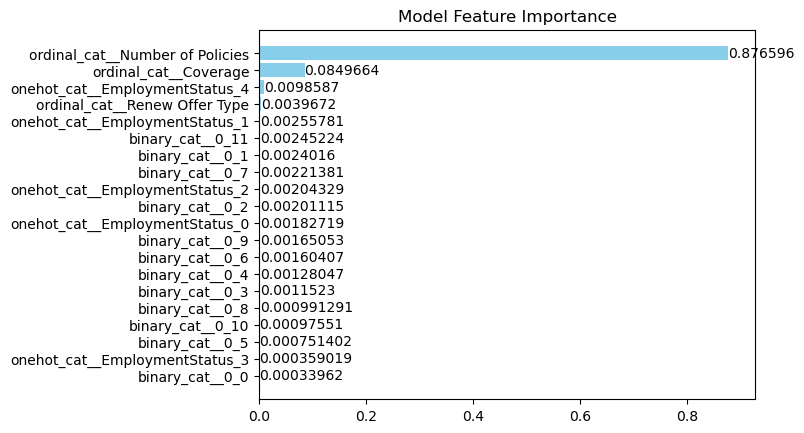

In [121]:
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(facecolor="none")
bars = ax.barh(feature_importance.index, feature_importance["Importances"].values, color='skyblue')
ax.set_xlim([0, feature_importance["Importances"].max() + 0.05])
ax.bar_label(bars)
plt.title("Model Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [122]:
y_pred = best_model.predict(X_test)

In [124]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

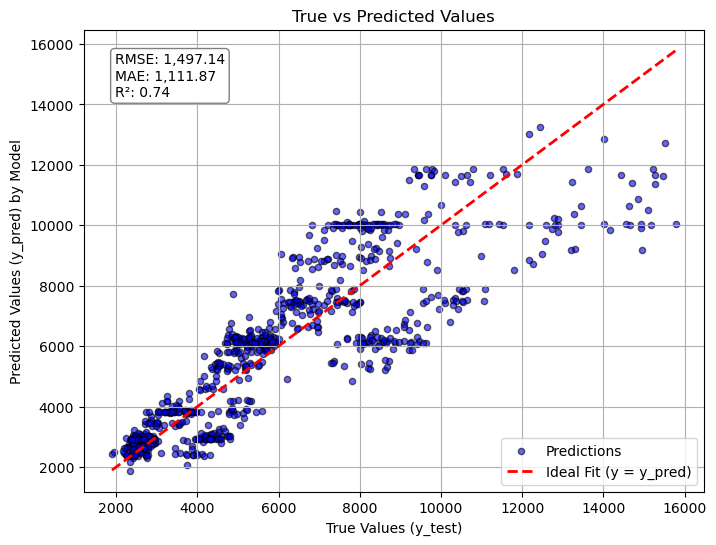

In [125]:
# --- Plot Visualisasi ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=20, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label="Ideal Fit (y = y_pred)")
plt.title("True vs Predicted Values")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred) by Model")
plt.legend()
plt.grid(True)

# --- Tambahkan Metrik ke dalam Plot ---
metrics_text = f"RMSE: {rmse:,.2f}\nMAE: {mae:,.2f}\nR²: {r2:.2f}"
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'))

plt.show()

## Kesimpulan

Berdasarkan hasil analisis Customer Lifetime Value (CLV) yang dilakukan, dapat disimpulkan bahwa model regresi Gradient Boosting menunjukkan performa terbaik dengan nilai *Root Mean Square Error (RMSE)* sebesar **3.922** tanpa cross validation dan tuning, *Mean Absolute Error (MAE)* sebesar **344.23** pada percobaan stacking, dan nilai *R-squared (R²)* sebesar **0.9167** pada Feature Selection di SFS, mengungguli model lain seperti Random Forest dan XGBoost. Nilai ini menunjukkan bahwa model mampu menjelaskan variasi CLV dengan baik dan memiliki error yang relatif kecil.

Analisis EDA (Exploratory Data Analysis) mengungkap bahwa **Number of Policies** merupakan fitur yang paling berpengaruh terhadap CLV, diikuti oleh **Monthly Premium Auto** dan **Coverage**. Pelanggan dengan **no polis 2** memiliki CLV tertinggi (12.987), sementara yang memiliki no polis 1 cenderung rendah (3.059). Selain itu, pelanggan dengan **Coverage Premium** menunjukkan CLV median tertinggi (8.689), sedangkan **Coverage Basic** terendah (5.283).

Teridentifikasi pula adanya *outlier* kontekstual pada pelanggan dengan no polis 2 yang memiliki CLV sangat tinggi, namun tidak ada fitur dalam dataset yang dapat menjelaskan fenomena ini secara detail. Hal ini menjadi indikasi bahwa mungkin ada faktor eksternal yang tidak tercapture dalam model.

Penerapan model ini memberikan wawasan yang lebih mendalam mengenai segmentasi pelanggan, sehingga perusahaan dapat memfokuskan strategi pemasaran dan retensi pada segmen yang paling menguntungkan. Selain itu, prediksi nilai CLV membantu dalam merencanakan anggaran pemasaran yang lebih efisien dan meningkatkan efektivitas kampanye akuisisi pelanggan baru.

Namun demikian, akurasi prediksi model masih dapat ditingkatkan dengan menambahkan fitur-fitur baru, melakukan optimasi model, serta mempertimbangkan non-linearitas pada hubungan antar variabel. Evaluasi secara berkala juga diperlukan untuk menjaga performa model tetap optimal seiring perubahan tren pasar dan perilaku pelanggan.

## Rekomendasi

1. **Optimalisasi Strategi Pemasaran**
   Fokuskan upaya pemasaran pada pelanggan dengan CLV tinggi, karena mereka memiliki potensi profitabilitas lebih besar. Kampanye khusus dapat dirancang untuk meningkatkan loyalitas dan mengurangi churn rate.

2. **Segmentasi Pelanggan Berbasis CLV**
   Lakukan segmentasi pelanggan berbasis nilai CLV untuk mengidentifikasi kelompok yang paling menguntungkan. Strategi retensi dapat dioptimalkan pada segmen tersebut untuk meningkatkan lifetime value.

3. **Peningkatan Data dan Model**
   Pertimbangkan untuk memperluas fitur yang digunakan dalam model, seperti data perilaku pelanggan, interaksi dengan layanan, dan histori transaksi yang lebih mendalam.

4. **Evaluasi Berkala terhadap Model**
   Model prediksi CLV perlu dievaluasi secara berkala untuk mengantisipasi perubahan tren dan pola pembelian pelanggan.

5. **Integrasi dengan CRM**
   Integrasikan hasil prediksi CLV dengan Customer Relationship Management (CRM) untuk memberikan penawaran yang lebih relevan dan personal kepada pelanggan bernilai tinggi.

## **Rekomendasi Bisnis Berbasis Prediksi CLV dengan Gradient Boosting**

Untuk mengoptimalkan prediksi Customer Lifetime Value (CLV) secara efektif, model Gradient Boosting perlu dimaksimalkan melalui beberapa strategi utama. Pertama, **optimalisasi model Gradient Boosting** dapat dilakukan dengan teknik hyperparameter tuning yang lebih mendalam, seperti **Bayesian Optimization** dan **Grid Search**. Teknik ini bertujuan untuk menemukan kombinasi parameter terbaik yang dapat meningkatkan akurasi prediksi CLV secara signifikan. Selain itu, eksplorasi model ensemble lanjutan seperti **Stacking** dan **Blending** juga direkomendasikan untuk memperkuat performa prediksi, terutama pada pola non-linear dan distribusi data yang kompleks.

Kedua, untuk menjaga kualitas prediksi yang stabil, penting untuk melakukan **peningkatan kualitas data secara berkala**. Hal ini meliputi proses **outlier removal** dan **normalisasi fitur numerik** agar model tidak bias terhadap nilai ekstrem dan lebih adaptif terhadap variasi data. Di samping itu, pengayaan fitur melalui **feature engineering** seperti penambahan informasi lama berlangganan, frekuensi klaim, dan interaksi antar fitur juga diperlukan untuk memperkaya konteks model dalam memprediksi CLV.

Ketiga, **monitoring model dan interpretasi prediksi** menjadi langkah penting dalam menjaga performa model jangka panjang. Evaluasi secara berkala, termasuk pemantauan fairness untuk menghindari bias terhadap kelompok pelanggan tertentu, harus diutamakan. Teknik interpretasi seperti **SHAP (SHapley Additive exPlanations)** direkomendasikan untuk memahami pengaruh setiap fitur terhadap prediksi CLV, sehingga pengambilan keputusan dapat lebih terarah dan tepat sasaran.

Keempat, hasil prediksi CLV yang telah dioptimalkan sebaiknya **diintegrasikan langsung dengan sistem CRM** perusahaan. Langkah ini memungkinkan perusahaan untuk melakukan segmentasi pelanggan secara otomatis, memberikan penawaran yang dipersonalisasi, dan memaksimalkan strategi retensi terhadap pelanggan bernilai tinggi. Untuk mempermudah analisis dan pemantauan, pengembangan **dashboard interaktif** diperlukan agar tim marketing dan manajemen dapat mengakses informasi prediktif secara real-time.

Terakhir, efektivitas strategi berbasis prediksi CLV perlu divalidasi secara terukur. Hal ini dapat dilakukan melalui **ROI Analysis** untuk mengukur pengembalian investasi dari kampanye yang ditargetkan dan **Churn Rate Monitoring** untuk mengidentifikasi dampak strategi retensi dalam menurunkan tingkat churn. Uji A/B juga dapat dimanfaatkan untuk mengukur dampak nyata dari perubahan strategi yang berbasis model prediksi ini. Evaluasi berkala akan memastikan bahwa implementasi optimasi CLV benar-benar memberikan kontribusi positif terhadap peningkatan profitabilitas perusahaan.
